## 전체 데이터

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
raw_path = './data/'
customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

FileNotFoundError: ignored

In [ ]:
geolocation.columns = ['customer_zip_code_prefix', 
                       'geolocation_lat', 
                       'geolocation_lng',
                       'geolocation_city', 
                       'geolocation_state']

olist_sellers.columns = ['seller_id', 
                         'customer_zip_code_prefix', 
                         'seller_city', 
                         'seller_state']

In [ ]:
# 필요한 데이터 합치기
df_all = pd.DataFrame()
df_all = orders.merge(order_items, on='order_id', how='outer')
df_all = df_all.merge(order_payments, on='order_id', how='outer')
df_all = df_all.merge(order_reviews, on='order_id', how='outer')
df_all = df_all.merge(olist_sellers, on='seller_id', how='outer')
df_all = df_all.merge(olist_products, on='product_id', how='outer')
df_all = df_all.merge(customer, on='customer_id', how='outer')

In [ ]:
# 필요한 데이터 합치기
df_all['yearmonth'] = df_all['order_purchase_timestamp'].map(lambda x:x[:7])
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all['order_purchase_timestamp'])
df_all['year'] = df_all['order_purchase_timestamp'].dt.year
df_all['month'] = df_all['order_purchase_timestamp'].dt.month
df_all['hour'] = df_all['order_purchase_timestamp'].dt.hour

In [ ]:
# 카테고리 딕셔너리를 이용하여 카테고리 영문으로 바꾸기
category_dict = {'perfumaria': 'perfumery', 'artes': 'art', 'esporte_lazer': 'sports_leisure', 'bebes': 'baby', 
                 'utilidades_domesticas': 'housewares', 'instrumentos_musicais': 'musical_instruments', 'cool_stuff': 'cool_stuff', 
                 'moveis_decoracao': 'furniture_decor', 'eletrodomesticos': 'home_appliances', 'brinquedos': 'toys', 
                 'cama_mesa_banho': 'bed_bath_table', 'construcao_ferramentas_seguranca': 'construction_tools_safety', 
                 'informatica_acessorios': 'computers_accessories', 'beleza_saude': 'health_beauty', 'malas_acessorios': 'luggage_accessories', 
                 'ferramentas_jardim': 'garden_tools', 'moveis_escritorio': 'office_furniture', 'automotivo': 'auto', 'eletronicos': 'electronics', 
                 'fashion_calcados': 'fashion_shoes', 'telefonia': 'telephony', 'papelaria': 'stationery', 
                 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories', 'pcs': 'computers', 'casa_construcao': 'home_construction', 
                 'relogios_presentes': 'watches_gifts', 'construcao_ferramentas_construcao': 'construction_tools_construction', 
                 'pet_shop': 'pet_shop', 'eletroportateis': 'small_appliances', 'agro_industria_e_comercio': 'agro_industry_and_commerce', 
                 'moveis_sala': 'furniture_living_room', 'sinalizacao_e_seguranca': 'signaling_and_security', 'climatizacao': 'air_conditioning', 
                 'consoles_games': 'consoles_games', 'livros_interesse_geral': 'books_general_interest', 
                 'construcao_ferramentas_ferramentas': 'costruction_tools_tools', 'fashion_underwear_e_moda_praia': 'fashion_underwear_beach', 
                 'fashion_roupa_masculina': 'fashion_male_clothing', 
                 'moveis_cozinha_area_de_servico_jantar_e_jardim': 'kitchen_dining_laundry_garden_furniture', 
                 'industria_comercio_e_negocios': 'industry_commerce_and_business', 'telefonia_fixa': 'fixed_telephony', 
                 'construcao_ferramentas_iluminacao': 'construction_tools_lights', 'livros_tecnicos': 'books_technical', 
                 'eletrodomesticos_2': 'home_appliances_2', 'artigos_de_festas': 'party_supplies', 'bebidas': 'drinks', 
                 'market_place': 'market_place', 'la_cuisine': 'la_cuisine', 'construcao_ferramentas_jardim': 'costruction_tools_garden', 
                 'fashion_roupa_feminina': 'fashio_female_clothing', 'casa_conforto': 'home_confort', 'audio': 'audio', 
                 'alimentos_bebidas': 'food_drink', 'musica': 'music', 'alimentos': 'food', 'tablets_impressao_imagem': 'tablets_printing_image', 
                 'livros_importados': 'books_imported', 'portateis_casa_forno_e_cafe': 'small_appliances_home_oven_and_coffee', 
                 'fashion_esporte': 'fashion_sport', 'artigos_de_natal': 'christmas_supplies', 
                 'fashion_roupa_infanto_juvenil': 'fashion_childrens_clothes', 'dvds_blu_ray': 'dvds_blu_ray', 
                 'artes_e_artesanato': 'arts_and_craftmanship', 'moveis_quarto': 'furniture_bedroom', 'cine_foto': 'cine_photo', 
                 'fraldas_higiene': 'diapers_and_hygiene', 'flores': 'flowers', 'casa_conforto_2': 'home_comfort_2', 
                 'seguros_e_servicos': 'security_and_services', 'moveis_colchao_e_estofado': 'furniture_mattress_and_upholstery', 
                 'cds_dvds_musicais': 'cds_dvds_musicals'}
df_all = df_all.replace(to_replace=category_dict)

### Customer's / Seller's State

In [ ]:
g = sns.countplot(data=df_all, x=df_all["customer_state"], orient='h')
g.set_title("Customer's State Distribution")
g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [ ]:
g = sns.countplot(data=df_all, x=df_all["seller_state"], orient='h')
g.set_title("Seller's State Distribution")
g.set_xticklabels(g.get_xticklabels(), rotation=45);

### 연도별 주문건수 증감율

In [ ]:
df_all_pivot = pd.pivot_table(data=df_all, index="product_category_name", columns='year', values='order_id', aggfunc='count')
df_all_pivot

In [ ]:
df_all_pivot["2017_주문수"] = 0
df_all_pivot["2018_주문수"] = ((df_all_pivot[2018]-df_all_pivot[2017]) / df_all_pivot[2018])*100
df_all_pivot["2018_주문수"]

In [ ]:
df_all_pivot_visu = df_all_pivot.stack(0).reset_index()
df_all_pivot_visu.columns = ["product_category_name", "kind", "values"]
df_all_pivot_visu

In [ ]:
import koreanize_matplotlib

plt.figure(figsize=(10,5))
sns.barplot(data=df_all_pivot_visu.query('kind=="2018_주문수"'), y="values", x="product_category_name")
plt.axhline(0, color='red', linestyle='--')
plt.title("2017년 대비 2018년 주문수 증감율")
plt.xticks(rotation=90);

In [ ]:
df_all_pivot["2016_주문수"] = 0
df_all_pivot["2017_주문수"] = ((df_all_pivot[2017]-df_all_pivot[2016]) / df_all_pivot[2016])*100
df_all_pivot["2017_주문수"]

df_all_pivot_visu = df_all_pivot.stack(0).reset_index()
df_all_pivot_visu.columns = ["product_category_name", "kind", "values"]
df_all_pivot_visu

plt.figure(figsize=(10,5))
sns.barplot(data=df_all_pivot_visu.query('kind=="2017_주문수"'), y="values", x="product_category_name")
plt.axhline(0, color='red', linestyle='--')
plt.title("2016년 대비 2017년 주문수 증감율")
plt.xticks(rotation=90);

### 주문건수가 많은 품목

In [ ]:
product_cat_num = df_all.groupby("product_category_name").aggregate({"order_id":"count"}).sort_values(by="order_id", ascending=False).reset_index()
product_cat_num.head()

In [ ]:
sns.barplot(data=product_cat_num[:15], x='product_category_name', y='order_id')
plt.title("주문 건수가 많은 품목")
plt.xticks(rotation=90)
plt.show()

### Order status

In [ ]:
import plotly.express as px

all_count = orders["order_status"].value_counts().sum()
status = orders["order_status"].value_counts().to_frame()
status['Percentage'] = round((orders["order_status"].value_counts() / all_count) *100,3)

In [ ]:
import plotly.express as px
fig = px.pie(status,
             values='Percentage',
             names=status.index,
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             title='Order status',
             hover_data=['order_status'])
fig.update_traces( textinfo='percent+label')
fig.update_layout(uniformtext_minsize=18)
fig.show()

## RFM

### top15 카테고리 합쳐서 RFM

In [ ]:
top15=['health_beauty',
 'watches_gifts',
 'bed_bath_table',
 'sports_leisure',
 'computers_accessories',
 'furniture_decor',
 'housewares',
 'cool_stuff',
 'auto',
 'garden_tools',
 'toys',
 'baby',
 'perfumery',
 'telephony',
 'office_furniture']

In [ ]:
df_top15 = df_all[df_all["product_category_name"].isin(top15)]
df_top15

In [ ]:
import datetime

max_date = max(df_top15["order_purchase_timestamp"]) + datetime.timedelta(days=1)

In [ ]:
rfm_data = df_top15.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_data.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_data.head()

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
3,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
4,0004bd2a26a76fe21f786e4fbd80607f,146,1,154.00


0.14981529988582173
count    74445.000000
mean         1.238176
std          0.862567
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: frequency, dtype: float64


<AxesSubplot:xlabel='frequency', ylabel='Count'>

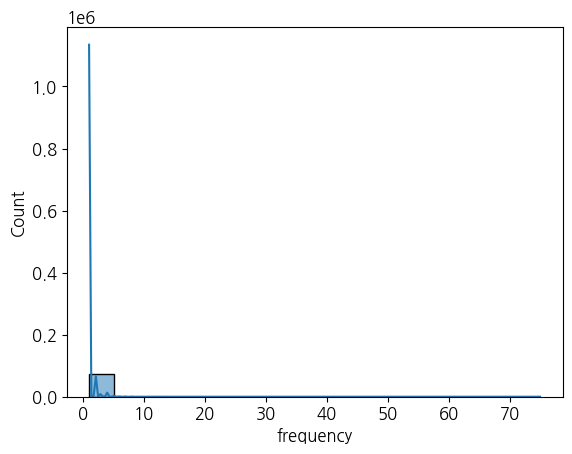

In [ ]:
print(rfm_data[rfm_data['frequency']>1].shape[0] / rfm_data.shape[0])
print(rfm_data['frequency'].describe())
sns.histplot(x='frequency', data=rfm_data, kde=True)

count    74445.000000
mean       145.942115
std        219.408470
min          3.500000
25%         49.900000
50%         91.000000
75%        159.990000
max      11383.950000
Name: monetary, dtype: float64


<AxesSubplot:xlabel='monetary', ylabel='Count'>

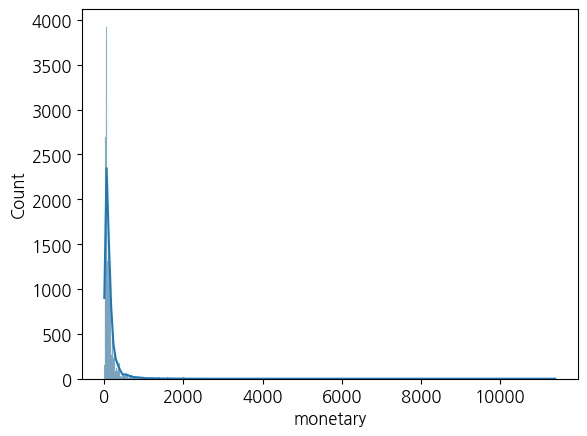

In [ ]:
print(rfm_data['monetary'].describe())
sns.histplot(x='monetary', data=rfm_data, kde=True)

count    74445.000000
mean       241.661173
std        153.337635
min          1.000000
25%        117.000000
50%        223.000000
75%        351.000000
max        724.000000
Name: recency, dtype: float64


<AxesSubplot:xlabel='recency', ylabel='Count'>

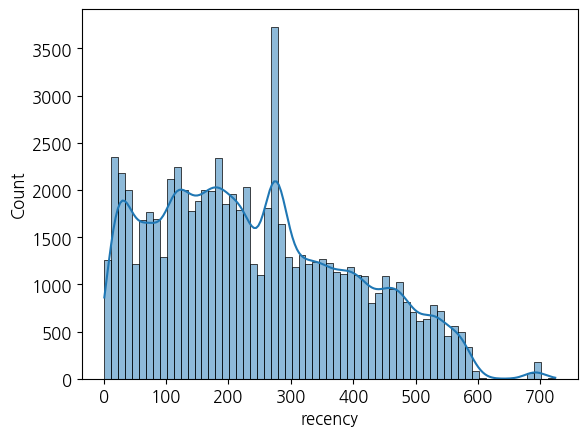

In [ ]:
print(rfm_data['recency'].describe())
sns.histplot(x='recency', data=rfm_data, kde=True)

In [ ]:
def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)


In [ ]:
r_labels = k_means_group(rfm_data[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_data[['frequency']],6,1)
m_labels = k_means_group(rfm_data[['monetary']],6,1)

rfm_data = rfm_data.assign(R = r_labels, F = f_labels, M = m_labels)

In [ ]:
rfm_data['R'] = rfm_data['R'] - 1
rfm_data['R'] = rfm_data['F'] - 1
rfm_data['R'] = rfm_data['M'] - 1

In [ ]:
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

In [ ]:
rfm_data['segment'] = rfm_data.apply(get_segment,axis=1)

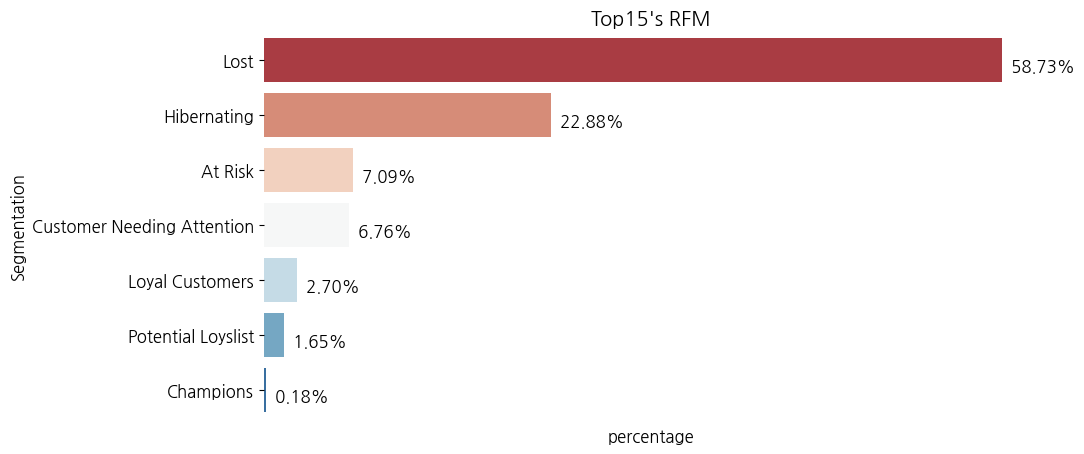

In [ ]:
plt.figure(figsize=(10,5))
percentage = (rfm_data['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("Top15's RFM")
plt.show()

In [ ]:
rfm_data

,customer_id,recency,frequency,monetary,R,F,M,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,1,1,2,Hibernating
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,0,1,1,Lost
2,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,0,1,1,Lost
3,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,1,1,2,Hibernating
4,0004bd2a26a76fe21f786e4fbd80607f,146,1,154.00,1,1,2,Hibernating
...,...,...,...,...,...,...,...,...
74440,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,3,2,4,Loyal Customers
74441,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,0,1,1,Lost
74442,ffff371b4d645b6ecea244b27531430a,568,1,89.90,0,1,1,Lost
74443,ffff5962728ec6157033ef9805bacc48,119,1,115.00,0,1,1,Lost


In [ ]:
segmentwise = rfm_data.groupby('segment').agg(RecencyMean = ("recency", "mean"),
                                     FrequencyMean = ("frequency", "mean"),
                                     MonetaryMean = ("monetary", "mean"),
                                     GroupSize=("recency", "size"))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segment,,,,
At Risk,237.673895,2.619473,198.730453,4704
Champions,245.522727,8.977273,3138.169545,44
Customer Needing Attention,245.891972,1.344266,453.072938,4360
Hibernating,238.379027,1.000000,185.015147,15801
Lost,242.494873,1.103223,63.543202,47693
Loyal Customers,253.253630,4.231365,1029.593717,1033
Potential Loyslist,241.987654,1.000000,986.166259,810


In [ ]:
!pip install squarify

In [ ]:
import matplotlib.pyplot as plt
import squarify

In [ ]:
segmentwise.index

Index(['At Risk', 'Champions', 'Customer Needing Attention', 'Hibernating',
       'Lost', 'Loyal Customers', 'Potential Loyslist'],
      dtype='object', name='segment')

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.text as mtext

# Refrence https://stackoverflow.com/questions/48079364/wrapping-text-not-working-in-matplotlib
# and https://stackoverflow.com/questions/50742503/how-do-i-get-the-height-of-a-wrapped-text-in-matplotlib
class WrapText(mtext.Text):
    def __init__(self,
                 x=0, y=0, text='',
                 width=0,
                 **kwargs):
        mtext.Text.__init__(self,
                 x=x, y=y, text=text,
                 wrap=True,
                 **kwargs)
        self.width = width  # in screen pixels. You could do scaling first

    def _get_wrap_line_width(self):
        return self.width
    
    def get_lines_num(self):
        return len(self._get_wrapped_text().split('\n'))
    

class WrapAnnotation(mtext.Annotation):
    def __init__(self,
                 text, xy,
                 width, **kwargs):
        mtext.Annotation.__init__(self, 
                                  text=text,
                                  xy=xy,
                                  wrap=True,
                                  **kwargs)
        self.width = width
        
    def _get_wrap_line_width(self):
        return self.width
    
    def get_lines_num(self):
        return len(self._get_wrapped_text().split('\n'))


def text_with_autofit(self, txt, xy, width, height, *, 
                      transform=None, 
                      ha='center', va='center',
                      wrap=False, show_rect=False,
                      min_size=1, adjust=0,
                      **kwargs):
    if transform is None:
        if isinstance(self, Axes):
            transform = self.transData
        if isinstance(self, Figure):
            transform = self.transFigure
        
        
    x_data = {'center': (xy[0] - width/2, xy[0] + width/2), 
            'left': (xy[0], xy[0] + width),
            'right': (xy[0] - width, xy[0])}
    y_data = {'center': (xy[1] - height/2, xy[1] + height/2),
            'bottom': (xy[1], xy[1] + height),
            'top': (xy[1] - height, xy[1])}
    
    (x0, y0) = transform.transform((x_data[ha][0], y_data[va][0]))
    (x1, y1) = transform.transform((x_data[ha][1], y_data[va][1]))
    # rectange region size to constrain the text
    rect_width = x1 - x0
    rect_height = y1- y0
    
    fig = self.get_figure() if isinstance(self, Axes) else self
    dpi = fig.dpi
    rect_height_inch = rect_height / dpi
    fontsize = rect_height_inch * 72

    if isinstance(self, Figure):
        if not wrap:
            text = self.text(*xy, txt, ha=ha, va=va, transform=transform, 
                             fontsize=min_size, 
                             **kwargs)
        else:
            fontsize /= 2
            text = WrapText(*xy, txt, width=rect_width, ha=ha, va=va,
                            transform=transform, fontsize=fontsize,
                            **kwargs)
            self.add_artist(text)
            
    if isinstance(self, Axes):
        if not wrap:
            text = self.annotate(txt, xy, ha=ha, va=va, xycoords=transform,
                                 fontsize=min_size, 
                                 **kwargs)
        else:
            fontsize /= 2
            text = WrapAnnotation(txt, xy, ha=ha, va=va, xycoords=transform,
                                  fontsize=fontsize, width=rect_width,
                                  **kwargs)
            self.add_artist(text)
    
    while fontsize > min_size:
        text.set_fontsize(fontsize)
        bbox = text.get_window_extent(fig.canvas.get_renderer())
        bbox_width = bbox.width / text.get_lines_num() if wrap else bbox.width
        if bbox_width <= rect_width:
            while bbox_width <= rect_width:
                fontsize += 1
                text.set_fontsize(fontsize)
                bbox = text.get_window_extent(fig.canvas.get_renderer())
                bbox_width = bbox.width / text.get_lines_num() if wrap else bbox.width
            else:
                fontsize = fontsize - 1
                text.set_fontsize(fontsize)
                break;
        
        fontsize /= 2      
    
    if fig.get_constrained_layout():
        c_fontsize = fontsize + adjust + 0.5
        text.set_fontsize(c_fontsize if c_fontsize > min_size else min_size)
    if fig.get_tight_layout():
        c_fontsize = fontsize + adjust
        text.set_fontsize(c_fontsize if c_fontsize > min_size else min_size)
    
    if show_rect and isinstance(self, Axes):   
        rect = mpatches.Rectangle((x_data[ha][0], y_data[va][0]), 
                                  width, height, fill=False, ls='--')
        self.add_patch(rect)
        
    return text

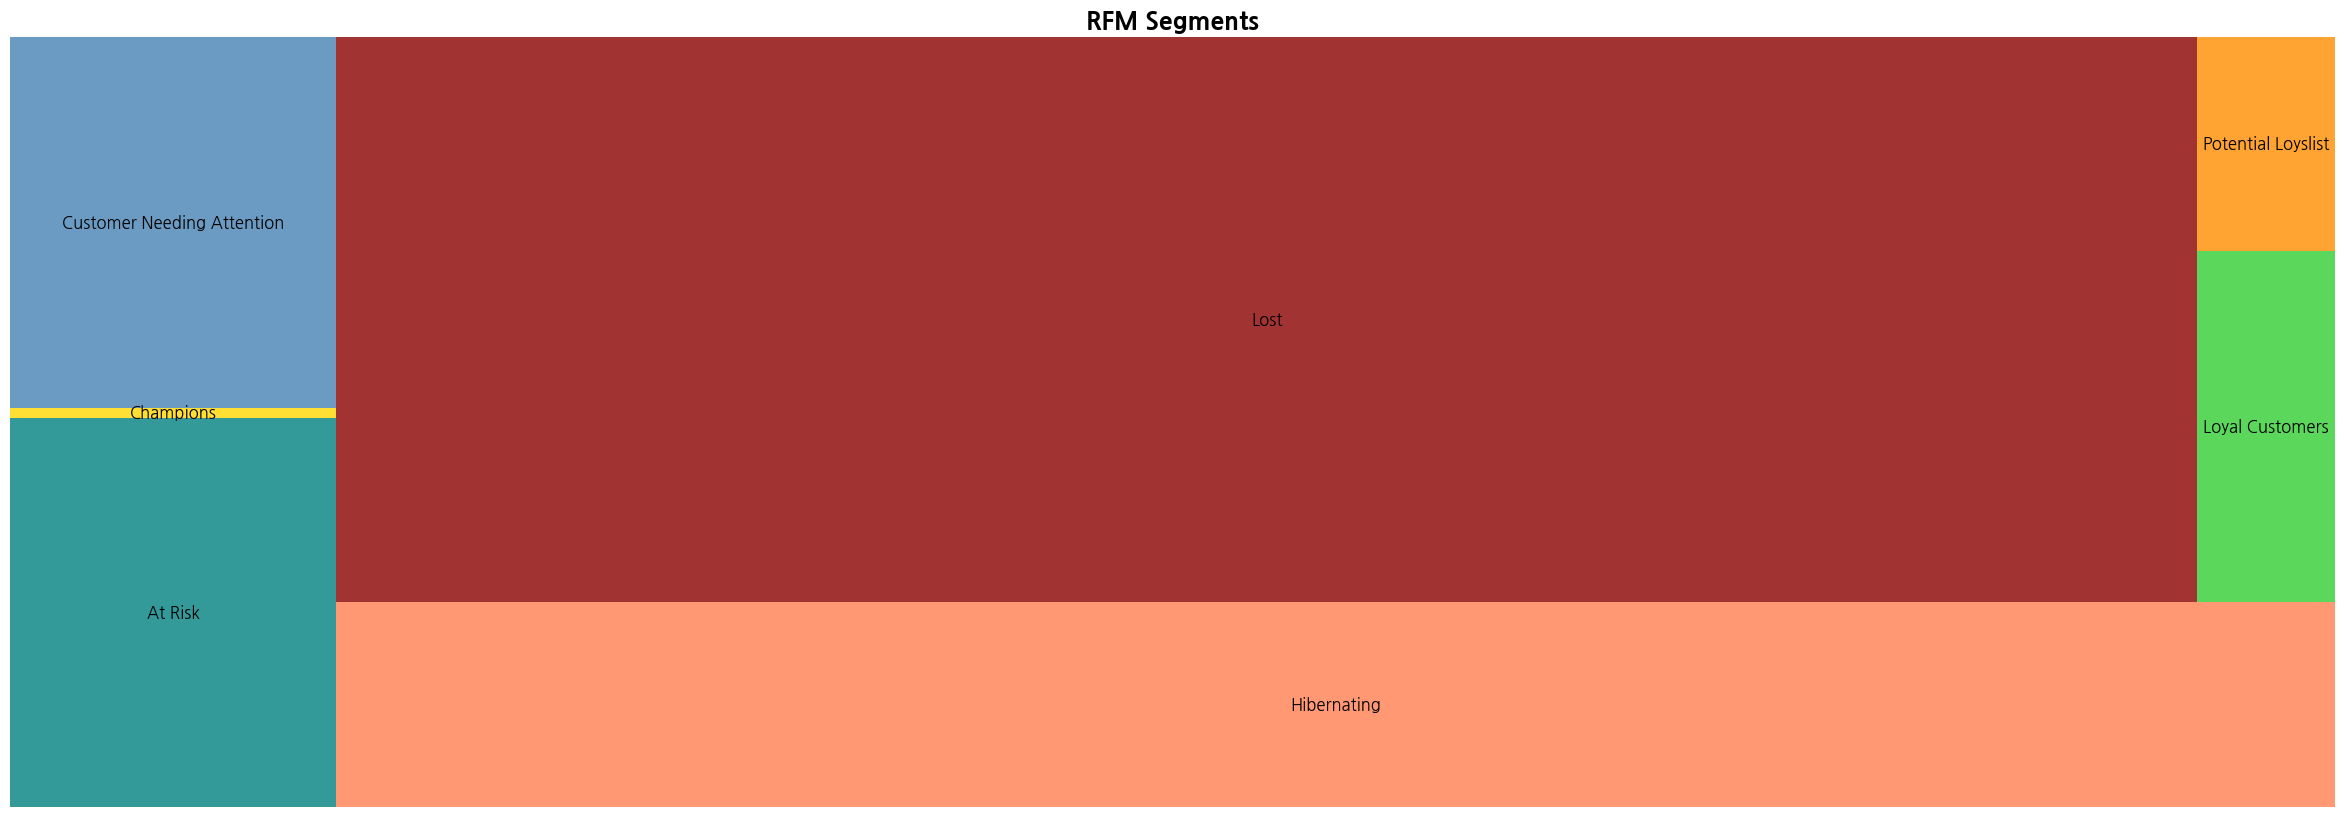

In [ ]:
import matplotlib.pyplot as plt
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(30,10)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['teal', 'gold', 'steelblue', 'coral', 'darkred','limegreen', 'darkorange','steelblue'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

### top15 의 카테고리별 RFM

In [ ]:
df_health_beauty = df_all[df_all['product_category_name'] == "health_beauty"]
df_watches_gifts = df_all[df_all['product_category_name'] == 'watches_gifts']
df_bed_bath_table = df_all[df_all['product_category_name'] == 'bed_bath_table']
df_sports_leisure = df_all[df_all['product_category_name'] == 'sports_leisure']
df_computers_accessories = df_all[df_all['product_category_name'] == 'computers_accessories']
df_furniture_decor = df_all[df_all['product_category_name'] == 'furniture_decor']
df_housewares = df_all[df_all['product_category_name'] == 'housewares']
df_cool_stuff = df_all[df_all['product_category_name'] == 'cool_stuff']
df_auto = df_all[df_all['product_category_name'] == 'auto']
df_garden_tools = df_all[df_all['product_category_name'] == 'garden_tools']
df_toys = df_all[df_all['product_category_name'] == 'toys']
df_baby = df_all[df_all['product_category_name'] == 'baby']
df_perfumery = df_all[df_all['product_category_name'] == 'perfumery']
df_telephony = df_all[df_all['product_category_name'] == 'telephony']
df_office_furniture = df_all[df_all['product_category_name'] == 'office_furniture']

In [ ]:
rfm_health_beauty = df_health_beauty.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_health_beauty.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_health_beauty.head()

,customer_id,recency,frequency,monetary
0,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
1,000a5ad9c4601d2bbdd9ed765d5213b3,384,1,76.99
2,0014a5a58da615f7b01a4f5e194bf5ea,223,1,88.00
3,00293787e2aec37a9c253b63fdfe2049,307,2,237.80
4,002ae492472e45ad6ebeb7a625409392,325,2,103.98


In [ ]:
rfm_watches_gifts = df_watches_gifts.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_watches_gifts.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_watches_gifts.head()

,customer_id,recency,frequency,monetary
0,0012929d977a8d7280bb277c1e5f589d,316,1,129.90
1,004df63539fd5e38d4b0a0506de7549c,45,1,949.99
2,005f060d4223956c62b64e9567a36f0f,99,1,689.00
3,00728bae3dec9c16b2193ab7e3195eb7,227,1,194.90
4,0077dc76aaf02323f03bce9b00878253,171,1,849.50


In [ ]:
rfm_bed_bath_table = df_bed_bath_table.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_bed_bath_table.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_bed_bath_table.head()

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0006fdc98a402fceb4eb0ee528f6a8d4,408,1,13.90
2,00090324bbad0e9342388303bb71ba0a,159,1,49.95
3,000c8bdb58a29e7115cfc257230fb21b,260,1,13.90
4,000de6019bb59f34c099a907c151d855,377,2,229.80


In [ ]:
rfm_sports_leisure = df_sports_leisure.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_sports_leisure.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_sports_leisure.head()

,customer_id,recency,frequency,monetary
0,00053a61a98854899e70ed204dd4bafe,183,2,382.00
1,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,104.90
2,00115fc7123b5310cf6d3a3aa932699e,585,1,59.99
3,0019e8c501c85848ac0966d45226fa1d,121,1,159.99
4,003c2067070f5b3d923235b1ea1cc17b,23,1,109.70


In [ ]:
rfm_computers_accessories = df_computers_accessories.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_computers_accessories.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_computers_accessories.head()

,customer_id,recency,frequency,monetary
0,000949456b182f53c18b68d6babc79c1,129,1,64.89
1,000ed48ceeb6f4bf8ad021a10a3c7b43,101,1,12.88
2,0011805441c0d1b68b48002f1d005526,493,1,269.00
3,001926cef41060fae572e2e7b30bd2a4,378,1,29.89
4,00196c4c9a3af7dd2ad10eade69c926f,33,1,22.32


In [ ]:
rfm_furniture_decor = df_furniture_decor.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_furniture_decor.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_furniture_decor.head()

,customer_id,recency,frequency,monetary
0,00256bf7b05c08f6a5849df3d0a64f1f,89,1,39.50
1,0029bd580d3012618731f5abb174a07f,301,1,39.90
2,0036b4a3d09ad551a5188c2e374da402,385,1,148.00
3,0037d2bbb9ebc39d9114aea27ee16d72,521,1,119.90
4,003ac9408252444b489b1bfc013f5f8c,166,1,18.75


In [ ]:
rfm_housewares = df_housewares.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_housewares.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_housewares.head()

,customer_id,recency,frequency,monetary
0,001147e649a7b1afd577e873841632dd,363,2,170.00
1,0019da6aa6bcb27cc32f1249bd12da05,200,1,79.90
2,001a2bf0e46c684031af91fb2bce149d,426,1,24.88
3,001a34eb30ecb8e3aacb07c475ca4dd1,49,1,151.90
4,001deb796b28a3a128d6113857569aa4,68,1,39.90


In [ ]:
rfm_cool_stuff = df_cool_stuff.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_cool_stuff.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_cool_stuff.head()

,customer_id,recency,frequency,monetary
0,0033f4a2887e07e25aa1204d482f41ba,65,1,350.00
1,00370dfde3d012c420d29657afc2fc8b,213,1,215.00
2,004288347e5e88a27ded2bb23747066c,399,1,229.99
3,00626f29f9b57d3ef7c1739ff03e944e,141,1,129.00
4,006d763076d74d16d66e828e79ec1544,390,1,79.90


In [ ]:
rfm_auto = df_auto.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_auto.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_auto.head()

,customer_id,recency,frequency,monetary
0,002311514717ca8b65b09a26cdf7b91a,64,1,116.25
1,0023557a94bef0038066b5d1b3dc763e,154,1,89.90
2,0037aa56b017c105c3a9d47af71fff98,215,1,425.00
3,00651d97d964127ccfc0e2e55464876d,184,1,15.00
4,00aba8ca6b7a455bcde671692a3f9e51,276,1,25.50


In [ ]:
rfm_garden_tools = df_garden_tools.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_garden_tools.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_garden_tools.head()

,customer_id,recency,frequency,monetary
0,0004bd2a26a76fe21f786e4fbd80607f,146,1,154.00
1,001ae5a1788703d64536c30362503e49,265,1,89.99
2,002feefec5af0a3b26ee7839c66d205e,305,1,59.90
3,003800162424b7b5b3d75c9cf22a66e7,150,1,85.50
4,003a7a8eb096ed3cbf713d2def1ca701,16,1,99.99


In [ ]:
rfm_toys = df_toys.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_toys.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_toys.head()

,customer_id,recency,frequency,monetary
0,000fbf0473c10fc1ab6f8d2d286ce20c,35,2,46.06
1,0032c76b20340da25249092a268ce66c,693,1,128.90
2,003e28cb6fab8a0901bff9229612375f,535,1,119.99
3,004493e0b0a37317d25665d340c0677d,84,1,64.99
4,0046311f458d8041b00063cb99482903,393,1,95.90


In [ ]:
rfm_baby = df_baby.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_baby.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_baby.head()

,customer_id,recency,frequency,monetary
0,003a5571a07dcf09bf117d13d2980ba3,36,1,149.9
1,0042dfa8925d6eb23e471ec350454f04,35,1,49.9
2,00605a8897ed9ad73b5c93bebad2541a,157,1,12.9
3,0067d2652c12515146721538868bbd80,72,1,169.9
4,00720f160ff500d3605a1bf403eb62d9,103,1,104.9


In [ ]:
rfm_perfumery = df_perfumery.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_perfumery.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_perfumery.head()

,customer_id,recency,frequency,monetary
0,0027324a96d26a2bc7d69262f83c8403,158,1,37.90
1,003650b504826ea534e02eba0ab58dd5,225,1,13.99
2,008f3d5f45a11059239a5c452cd00006,581,1,309.90
3,009301957bc7714394865c44650d8060,433,1,84.99
4,00a1c6913daeda0b7f9b79f802805fdb,246,1,84.99


In [ ]:
rfm_telephony = df_telephony.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_telephony.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_telephony.head()

,customer_id,recency,frequency,monetary
0,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
1,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
2,00050ab1314c0e55a6ca13cf7181fecf,132,1,27.99
3,000d460961d6dbfa3ec6c9f5805769e1,234,1,28.90
4,004256f082951ec189a4962b6788c214,160,1,245.00


In [ ]:
rfm_office_furniture = df_office_furniture.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_office_furniture.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_office_furniture.head()

,customer_id,recency,frequency,monetary
0,002043098f10ba39a4600b6c52fbfe3c,521,1,176.99
1,0028a7d8db7b0247652509358ad8d755,259,2,548.00
2,002cdf87d4c03f08f7eb4551a923affc,302,1,196.99
3,004177f7bf62929186b32c7fdaa6157b,314,2,393.98
4,004f84d065096f3cedd26cf0adc80b9d,126,2,159.98


## K-means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [ ]:
r_labels = k_means_group(rfm_health_beauty[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_health_beauty[['frequency']],6,1)
m_labels = k_means_group(rfm_health_beauty[['monetary']],6,1)

rfm_health_beauty = rfm_health_beauty.assign(R = r_labels, F = f_labels, M = m_labels) 

In [ ]:
rfm_health_beauty['R'] = rfm_health_beauty['R'] - 1
rfm_health_beauty['R'] = rfm_health_beauty['F'] - 1
rfm_health_beauty['R'] = rfm_health_beauty['M'] - 1

In [ ]:
rfm_health_beauty

,customer_id,recency,frequency,monetary,R,F,M
0,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,0,1,1
1,000a5ad9c4601d2bbdd9ed765d5213b3,384,1,76.99,0,1,1
2,0014a5a58da615f7b01a4f5e194bf5ea,223,1,88.00,0,1,1
3,00293787e2aec37a9c253b63fdfe2049,307,2,237.80,1,2,2
4,002ae492472e45ad6ebeb7a625409392,325,2,103.98,0,2,1
...,...,...,...,...,...,...,...
8673,ffe4c3aa14d4702fb11fe5b3c4dd755c,462,1,118.90,0,1,1
8674,ffe4d6bcc48632f0bb1bedf53702cc4b,175,1,70.00,0,1,1
8675,ffe6305176b9431a3eda3cf8904d7eb7,81,1,49.98,0,1,1
8676,fff1afc79f6b5db1e235a4a6c30ceda7,364,1,34.99,0,1,1


In [ ]:
rfm_health_beauty.describe()

,recency,frequency,monetary,R,F,M
count,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000
mean,218.189099,1.156027,150.028575,0.302143,1.137589,1.302143
std,156.491973,0.601824,213.926995,0.625030,0.441810,0.625030
min,1.000000,1.000000,4.400000,0.000000,1.000000,1.000000
25%,85.000000,1.000000,49.900000,0.000000,1.000000,1.000000
50%,189.000000,1.000000,89.900000,0.000000,1.000000,1.000000
75%,323.000000,1.000000,158.925000,0.000000,1.000000,1.000000
max,714.000000,21.000000,6248.000000,5.000000,6.000000,6.000000


In [ ]:
rfm_health_beauty.groupby('R')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
R,,,,,,,,
0,6697.0,218.114230,155.115867,1.0,86.00,190.0,321.00,714.0
1,1465.0,218.406143,159.403506,2.0,84.00,185.0,331.00,694.0
2,404.0,216.643564,166.711342,1.0,77.50,180.0,323.75,694.0
3,100.0,216.620000,159.679843,4.0,77.75,195.0,363.00,572.0
4,11.0,302.454545,195.040182,33.0,119.50,299.0,438.50,600.0
5,1.0,256.000000,NaN,256.0,256.00,256.0,256.00,256.0


In [ ]:
rfm_health_beauty.groupby('F')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
F,,,,,,,,
1,7756.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
2,703.0,2.000000,0.000000,2.0,2.0,2.0,2.00,2.0
3,172.0,3.325581,0.469960,3.0,3.0,3.0,4.00,4.0
4,42.0,5.571429,0.737261,5.0,5.0,5.0,6.00,8.0
5,4.0,10.750000,0.957427,10.0,10.0,10.5,11.25,12.0
6,1.0,21.000000,NaN,21.0,21.0,21.0,21.00,21.0


In [ ]:
rfm_health_beauty.groupby('M')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
M,,,,,,,,
1,6697.0,73.856130,40.428027,4.40,39.80,66.90,100.000,176.0
2,1465.0,277.782833,72.664130,176.60,200.00,269.90,339.990,439.0
3,404.0,595.440470,120.986858,439.65,503.34,550.00,653.940,918.0
4,100.0,1251.856700,198.949443,934.70,1099.00,1219.95,1359.225,1850.0
5,11.0,2580.909091,458.475561,1980.00,2174.50,2699.00,2849.325,3300.0
6,1.0,6248.000000,NaN,6248.00,6248.00,6248.00,6248.000,6248.0


In [ ]:
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

In [ ]:
rfm_health_beauty['segment'] = rfm_health_beauty.apply(get_segment,axis=1)

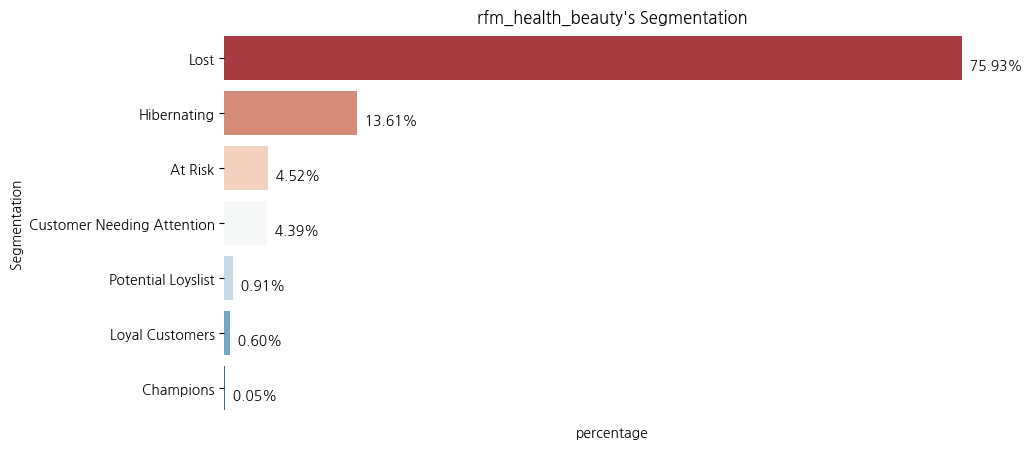

In [ ]:
plt.figure(figsize=(10,5))
percentage = (rfm_health_beauty['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_health_beauty's Segmentation")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

r_labels = k_means_group(rfm_watches_gifts[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_watches_gifts[['frequency']],6,1)
m_labels = k_means_group(rfm_watches_gifts[['monetary']],6,1)

rfm_watches_gifts = rfm_watches_gifts.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_watches_gifts['R'] = rfm_watches_gifts['R'] - 1
rfm_watches_gifts['R'] = rfm_watches_gifts['F'] - 1
rfm_watches_gifts['R'] = rfm_watches_gifts['M'] - 1

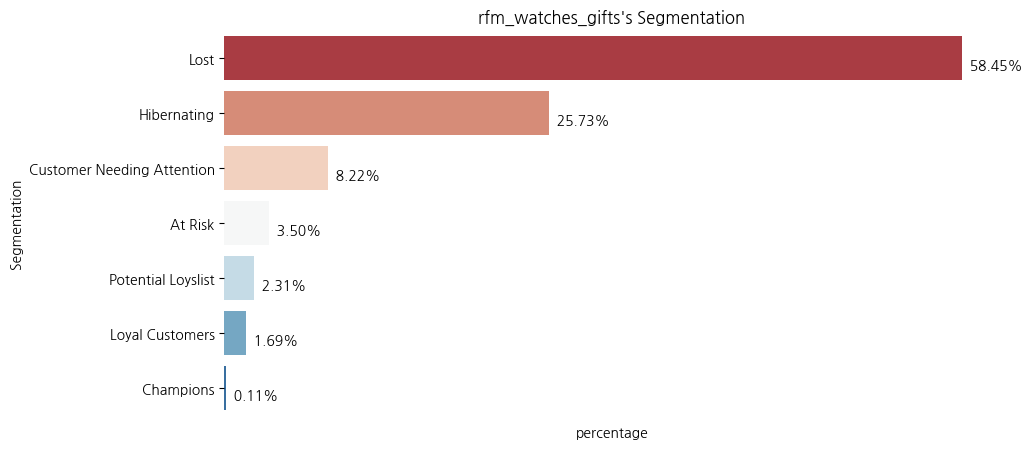

In [ ]:
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

rfm_watches_gifts['segment'] = rfm_watches_gifts.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_watches_gifts['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_watches_gifts's Segmentation")
plt.show()

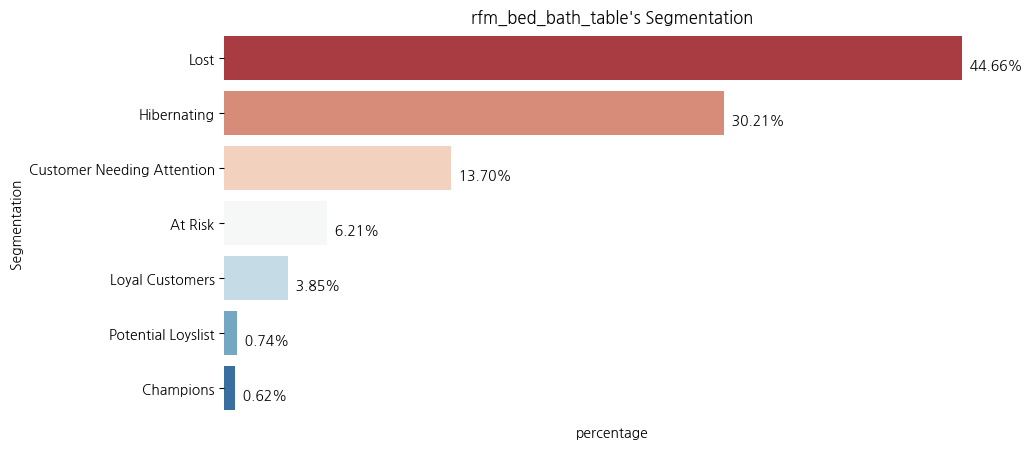

In [ ]:
r_labels = k_means_group(rfm_bed_bath_table[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_bed_bath_table[['frequency']],6,1)
m_labels = k_means_group(rfm_bed_bath_table[['monetary']],6,1)

rfm_bed_bath_table = rfm_bed_bath_table.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_bed_bath_table['R'] = rfm_bed_bath_table['R'] - 1
rfm_bed_bath_table['R'] = rfm_bed_bath_table['F'] - 1
rfm_bed_bath_table['R'] = rfm_bed_bath_table['M'] - 1


rfm_bed_bath_table['segment'] = rfm_bed_bath_table.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_bed_bath_table['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_bed_bath_table's Segmentation")
plt.show()

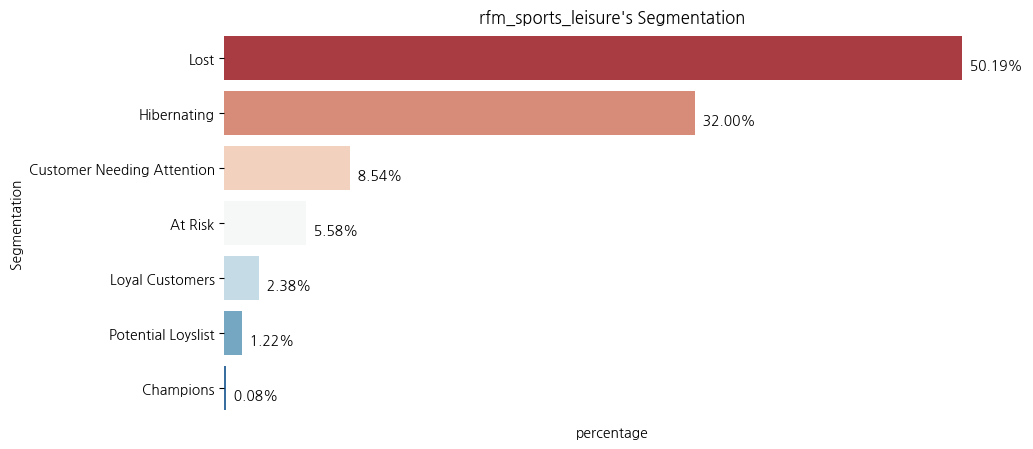

In [ ]:
r_labels = k_means_group(rfm_sports_leisure[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_sports_leisure[['frequency']],6,1)
m_labels = k_means_group(rfm_sports_leisure[['monetary']],6,1)

rfm_sports_leisure = rfm_sports_leisure.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_sports_leisure['R'] = rfm_sports_leisure['R'] - 1
rfm_sports_leisure['R'] = rfm_sports_leisure['F'] - 1
rfm_sports_leisure['R'] = rfm_sports_leisure['M'] - 1


rfm_sports_leisure['segment'] = rfm_sports_leisure.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_sports_leisure['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_sports_leisure's Segmentation")
plt.show()

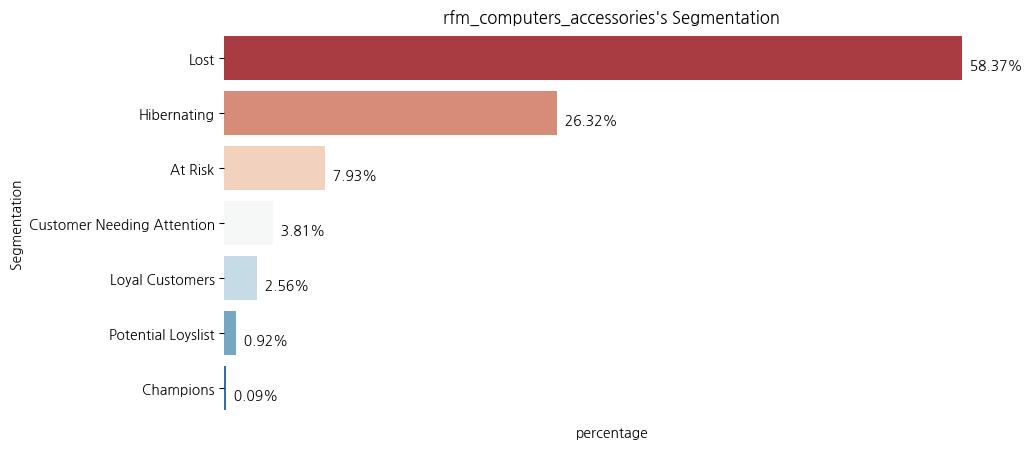

In [ ]:
r_labels = k_means_group(rfm_computers_accessories[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_computers_accessories[['frequency']],6,1)
m_labels = k_means_group(rfm_computers_accessories[['monetary']],6,1)

rfm_computers_accessories = rfm_computers_accessories.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_computers_accessories['R'] = rfm_computers_accessories['R'] - 1
rfm_computers_accessories['R'] = rfm_computers_accessories['F'] - 1
rfm_computers_accessories['R'] = rfm_computers_accessories['M'] - 1


rfm_computers_accessories['segment'] = rfm_computers_accessories.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_computers_accessories['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_computers_accessories's Segmentation")
plt.show()

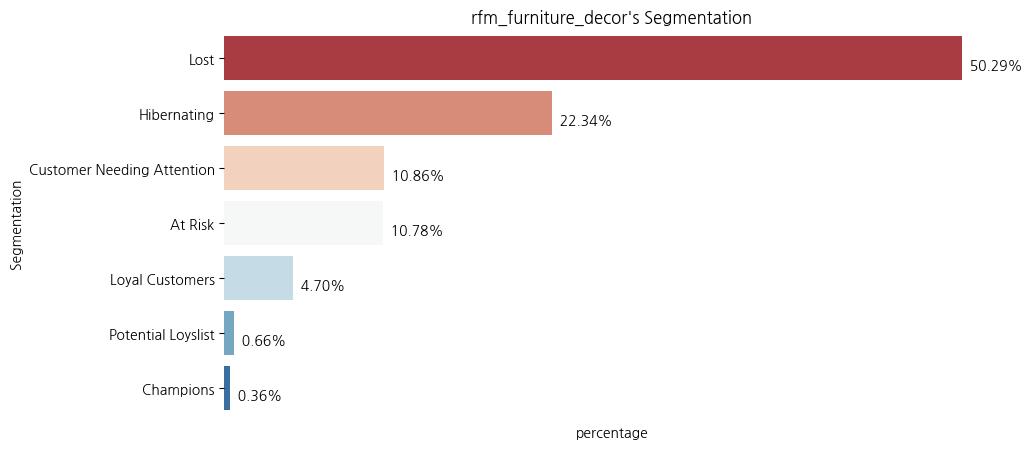

In [ ]:
r_labels = k_means_group(rfm_furniture_decor[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_furniture_decor[['frequency']],6,1)
m_labels = k_means_group(rfm_furniture_decor[['monetary']],6,1)

rfm_furniture_decor = rfm_furniture_decor.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_furniture_decor['R'] = rfm_furniture_decor['R'] - 1
rfm_furniture_decor['R'] = rfm_furniture_decor['F'] - 1
rfm_furniture_decor['R'] = rfm_furniture_decor['M'] - 1


rfm_furniture_decor['segment'] = rfm_furniture_decor.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_furniture_decor['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_furniture_decor's Segmentation")
plt.show()

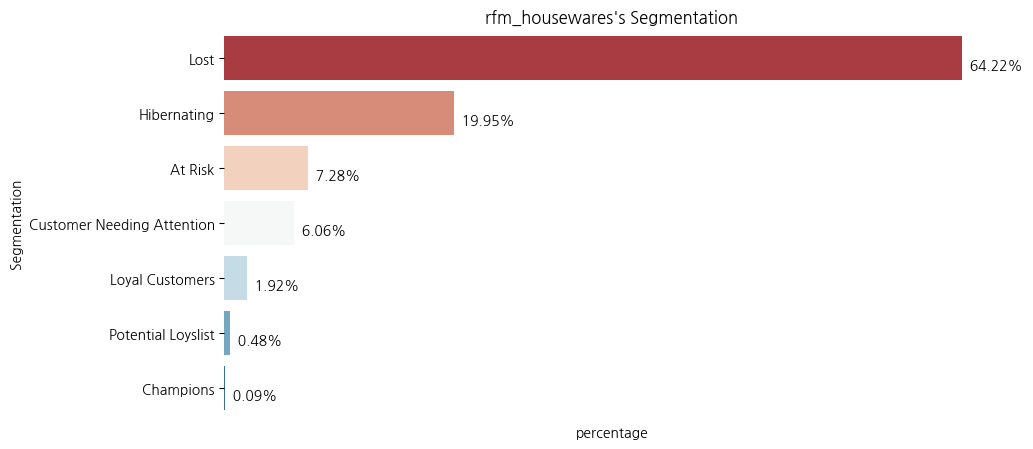

In [ ]:
r_labels = k_means_group(rfm_housewares[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_housewares[['frequency']],6,1)
m_labels = k_means_group(rfm_housewares[['monetary']],6,1)

rfm_housewares = rfm_housewares.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_housewares['R'] = rfm_housewares['R'] - 1
rfm_housewares['R'] = rfm_housewares['F'] - 1
rfm_housewares['R'] = rfm_housewares['M'] - 1


rfm_housewares['segment'] = rfm_housewares.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_housewares['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_housewares's Segmentation")
plt.show()

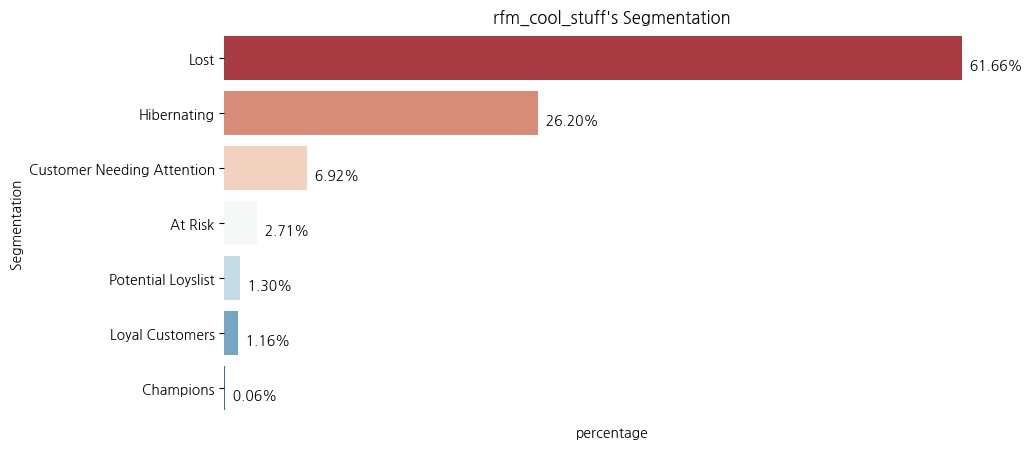

In [ ]:
r_labels = k_means_group(rfm_cool_stuff[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_cool_stuff[['frequency']],6,1)
m_labels = k_means_group(rfm_cool_stuff[['monetary']],6,1)

rfm_cool_stuff = rfm_cool_stuff.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_cool_stuff['R'] = rfm_cool_stuff['R'] - 1
rfm_cool_stuff['R'] = rfm_cool_stuff['F'] - 1
rfm_cool_stuff['R'] = rfm_cool_stuff['M'] - 1


rfm_cool_stuff['segment'] = rfm_cool_stuff.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_cool_stuff['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_cool_stuff's Segmentation")
plt.show()

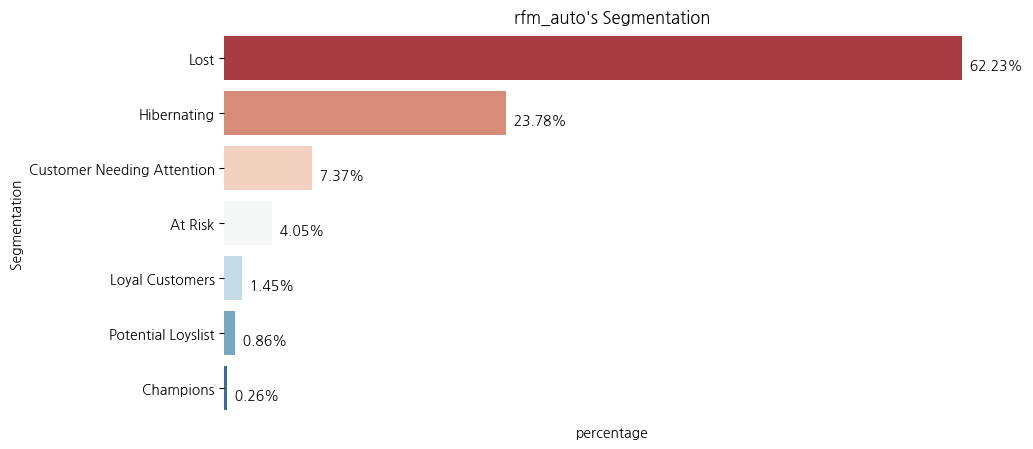

In [ ]:
r_labels = k_means_group(rfm_auto[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_auto[['frequency']],6,1)
m_labels = k_means_group(rfm_auto[['monetary']],6,1)

rfm_auto = rfm_auto.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_auto['R'] = rfm_auto['R'] - 1
rfm_auto['R'] = rfm_auto['F'] - 1
rfm_auto['R'] = rfm_auto['M'] - 1


rfm_auto['segment'] = rfm_auto.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_auto['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_auto's Segmentation")
plt.show()

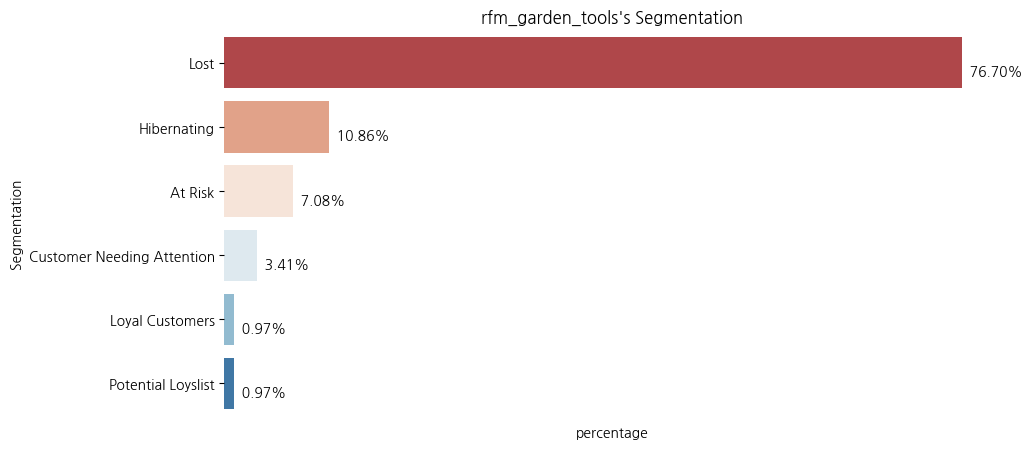

In [ ]:
r_labels = k_means_group(rfm_garden_tools[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_garden_tools[['frequency']],6,1)
m_labels = k_means_group(rfm_garden_tools[['monetary']],6,1)

rfm_garden_tools = rfm_garden_tools.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_garden_tools['R'] = rfm_garden_tools['R'] - 1
rfm_garden_tools['R'] = rfm_garden_tools['F'] - 1
rfm_garden_tools['R'] = rfm_garden_tools['M'] - 1


rfm_garden_tools['segment'] = rfm_garden_tools.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_garden_tools['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_garden_tools's Segmentation")
plt.show()

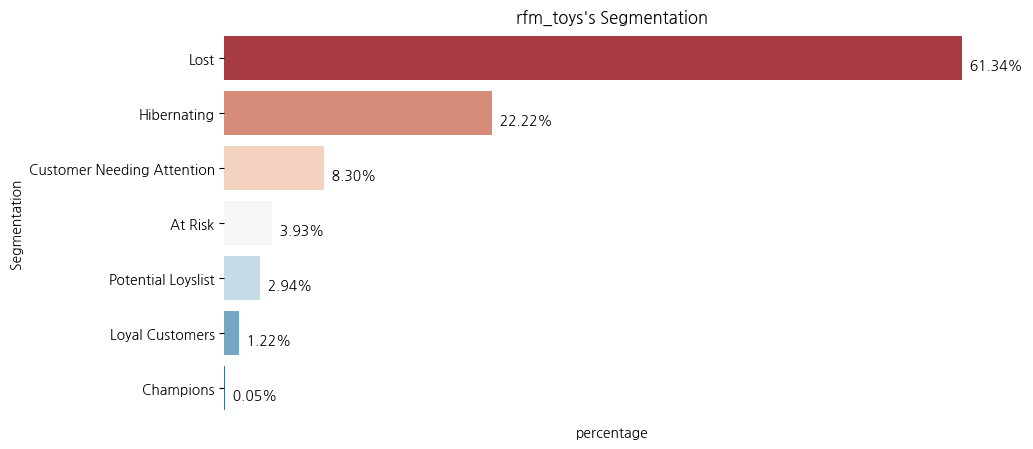

In [ ]:
r_labels = k_means_group(rfm_toys[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_toys[['frequency']],6,1)
m_labels = k_means_group(rfm_toys[['monetary']],6,1)

rfm_toys = rfm_toys.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_toys['R'] = rfm_toys['R'] - 1
rfm_toys['R'] = rfm_toys['F'] - 1
rfm_toys['R'] = rfm_toys['M'] - 1


rfm_toys['segment'] = rfm_toys.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_toys['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_toys's Segmentation")
plt.show()

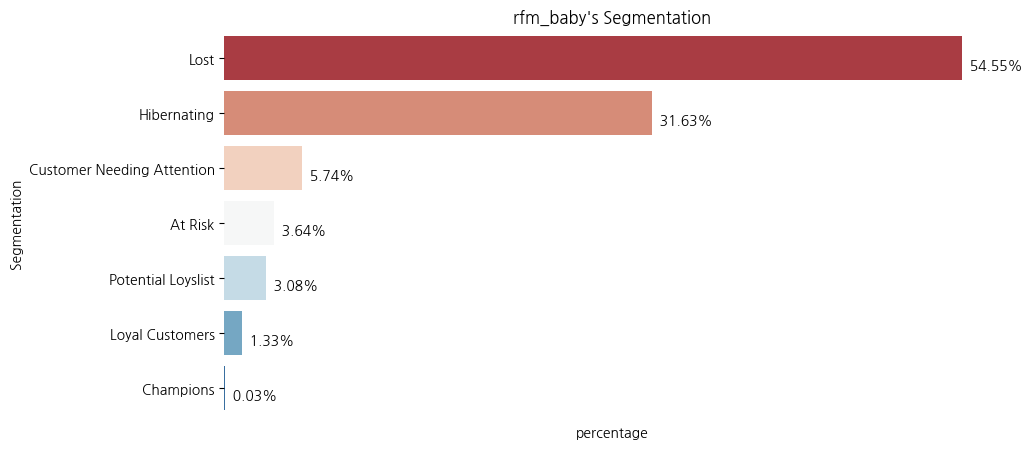

In [ ]:
r_labels = k_means_group(rfm_baby[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_baby[['frequency']],6,1)
m_labels = k_means_group(rfm_baby[['monetary']],6,1)

rfm_baby = rfm_baby.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_baby['R'] = rfm_baby['R'] - 1
rfm_baby['R'] = rfm_baby['F'] - 1
rfm_baby['R'] = rfm_baby['M'] - 1


rfm_baby['segment'] = rfm_baby.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_baby['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_baby's Segmentation")
plt.show()

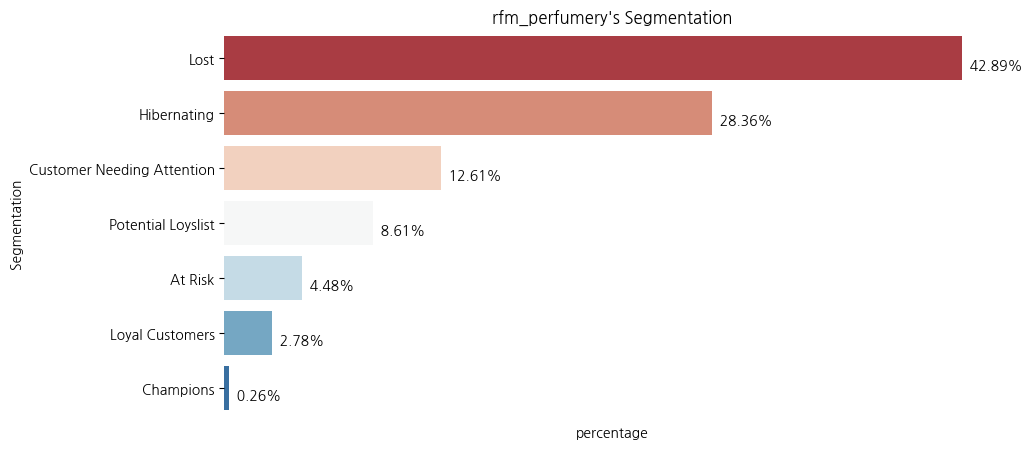

In [ ]:
r_labels = k_means_group(rfm_perfumery[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_perfumery[['frequency']],6,1)
m_labels = k_means_group(rfm_perfumery[['monetary']],6,1)

rfm_perfumery = rfm_perfumery.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_perfumery['R'] = rfm_perfumery['R'] - 1
rfm_perfumery['R'] = rfm_perfumery['F'] - 1
rfm_perfumery['R'] = rfm_perfumery['M'] - 1


rfm_perfumery['segment'] = rfm_perfumery.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_perfumery['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_perfumery's Segmentation")
plt.show()

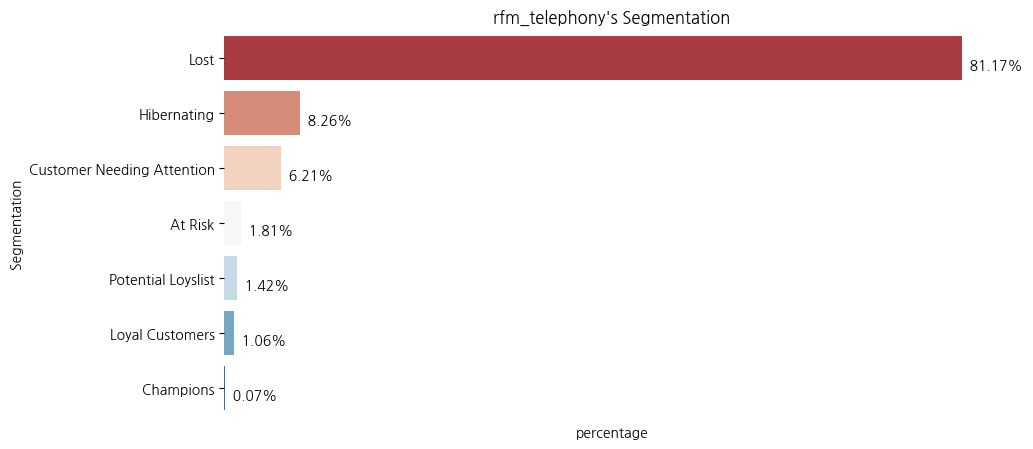

In [ ]:
r_labels = k_means_group(rfm_telephony[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_telephony[['frequency']],6,1)
m_labels = k_means_group(rfm_telephony[['monetary']],6,1)

rfm_telephony = rfm_telephony.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_telephony['R'] = rfm_telephony['R'] - 1
rfm_telephony['R'] = rfm_telephony['F'] - 1
rfm_telephony['R'] = rfm_telephony['M'] - 1


rfm_telephony['segment'] = rfm_telephony.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_telephony['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_telephony's Segmentation")
plt.show()

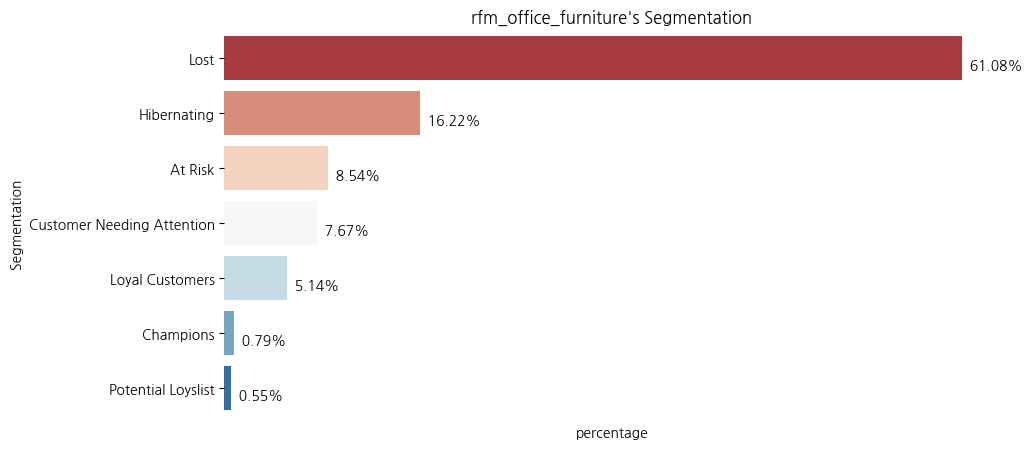

In [ ]:
r_labels = k_means_group(rfm_office_furniture[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_office_furniture[['frequency']],6,1)
m_labels = k_means_group(rfm_office_furniture[['monetary']],6,1)

rfm_office_furniture = rfm_office_furniture.assign(R = r_labels, F = f_labels, M = m_labels) 


rfm_office_furniture['R'] = rfm_office_furniture['R'] - 1
rfm_office_furniture['R'] = rfm_office_furniture['F'] - 1
rfm_office_furniture['R'] = rfm_office_furniture['M'] - 1


rfm_office_furniture['segment'] = rfm_office_furniture.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_office_furniture['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("rfm_office_furniture's Segmentation")
plt.show()

## Top8

In [ ]:
top8 = ['health_beauty',
 'furniture_decor',
 'auto',
 'watches_gifts',
 'bed_bath_table',
 'computers_accessories',
 'housewares',
 'sports_leisure']

### 수정

In [ ]:
df_top8 = df_all[df_all["product_category_name"].isin(top8)]
df_top8 = df_top8[df_top8['year'] == 2018]

In [ ]:
rfm_data = df_top8.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_data.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_data.head()

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,00053a61a98854899e70ed204dd4bafe,183,2,382.00
3,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,104.90
4,00090324bbad0e9342388303bb71ba0a,159,1,49.95


0.1460637068823238
count    30295.000000
mean         1.221852
std          0.736220
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         24.000000
Name: frequency, dtype: float64


<AxesSubplot:xlabel='frequency', ylabel='Count'>

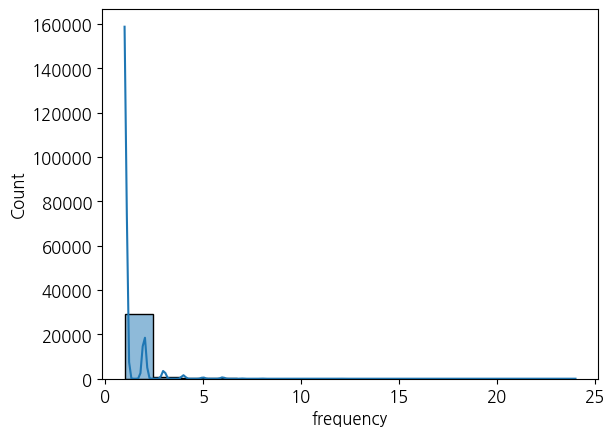

In [ ]:
# 15%의 구매자가 1번 이상의 구매를 한다.매우 불균형함.
print(rfm_data[rfm_data['frequency']>1].shape[0] / rfm_data.shape[0])
print(rfm_data['frequency'].describe())
sns.histplot(x='frequency', data=rfm_data, kde=True)

count    30295.000000
mean       143.904776
std        201.588736
min          3.500000
25%         53.490000
50%         97.000000
75%        159.000000
max       9520.140000
Name: monetary, dtype: float64


<AxesSubplot:xlabel='monetary', ylabel='Count'>

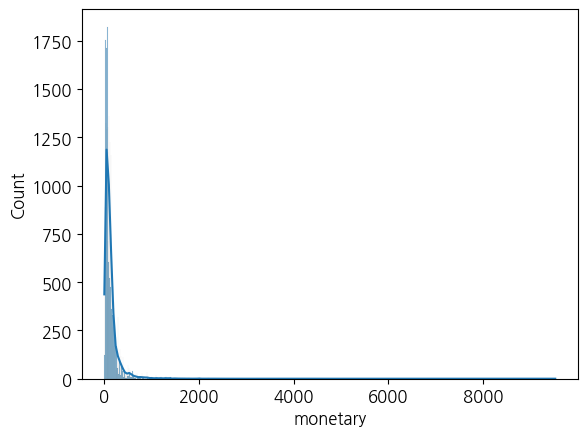

In [ ]:
# 평균적으로 구매자는 $145 상당의 구매를 보이고, 75%의 구매자들은 구매 금액이 $159를 넘지 않는다.
print(rfm_data['monetary'].describe())
sns.histplot(x='monetary', data=rfm_data, kde=True)

count    30295.000000
mean       121.397128
std         68.679902
min          1.000000
25%         62.000000
50%        122.000000
75%        181.000000
max        241.000000
Name: recency, dtype: float64


<AxesSubplot:xlabel='recency', ylabel='Count'>

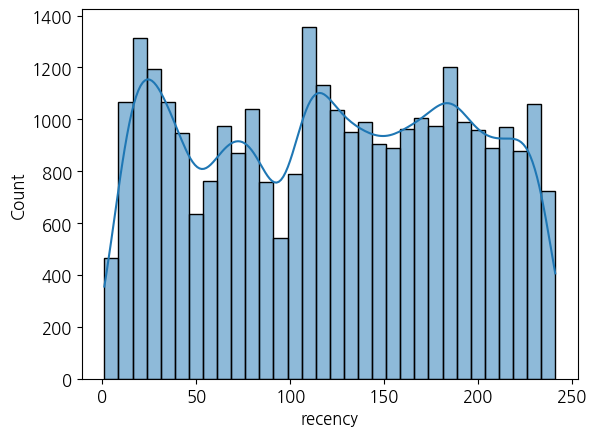

In [ ]:
print(rfm_data['recency'].describe())
sns.histplot(x='recency', data=rfm_data, kde=True)

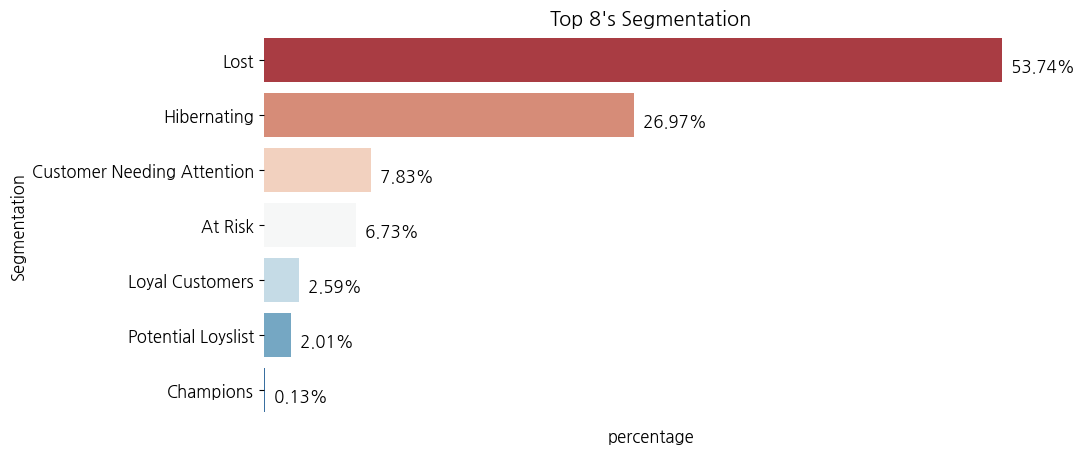

In [ ]:
def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

r_labels = k_means_group(rfm_data[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_data[['frequency']],6,1)
m_labels = k_means_group(rfm_data[['monetary']],6,1)

rfm_data = rfm_data.assign(R = r_labels, F = f_labels, M = m_labels)

rfm_data['R'] = rfm_data['R'] - 1
rfm_data['R'] = rfm_data['F'] - 1
rfm_data['R'] = rfm_data['M'] - 1

def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

rfm_data['segment'] = rfm_data.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_data['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("Top 8's Segmentation")
plt.show()

In [ ]:
segmentwise = rfm_data.groupby('segment').agg(RecencyMean = ("recency", "mean"),
                                     FrequencyMean = ("frequency", "mean"),
                                     MonetaryMean = ("monetary", "mean"),
                                     GroupSize=("recency", "size"))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segment,,,,
At Risk,127.847474,2.479647,155.593060,2039
Champions,108.948718,5.128205,2277.350513,39
Customer Needing Attention,124.059469,1.242092,331.526908,2371
Hibernating,121.336842,1.000000,150.751494,8170
Lost,120.062584,1.071981,57.431842,16282
Loyal Customers,124.058524,3.286260,752.855751,786
Potential Loyslist,123.289474,1.000000,672.671694,608


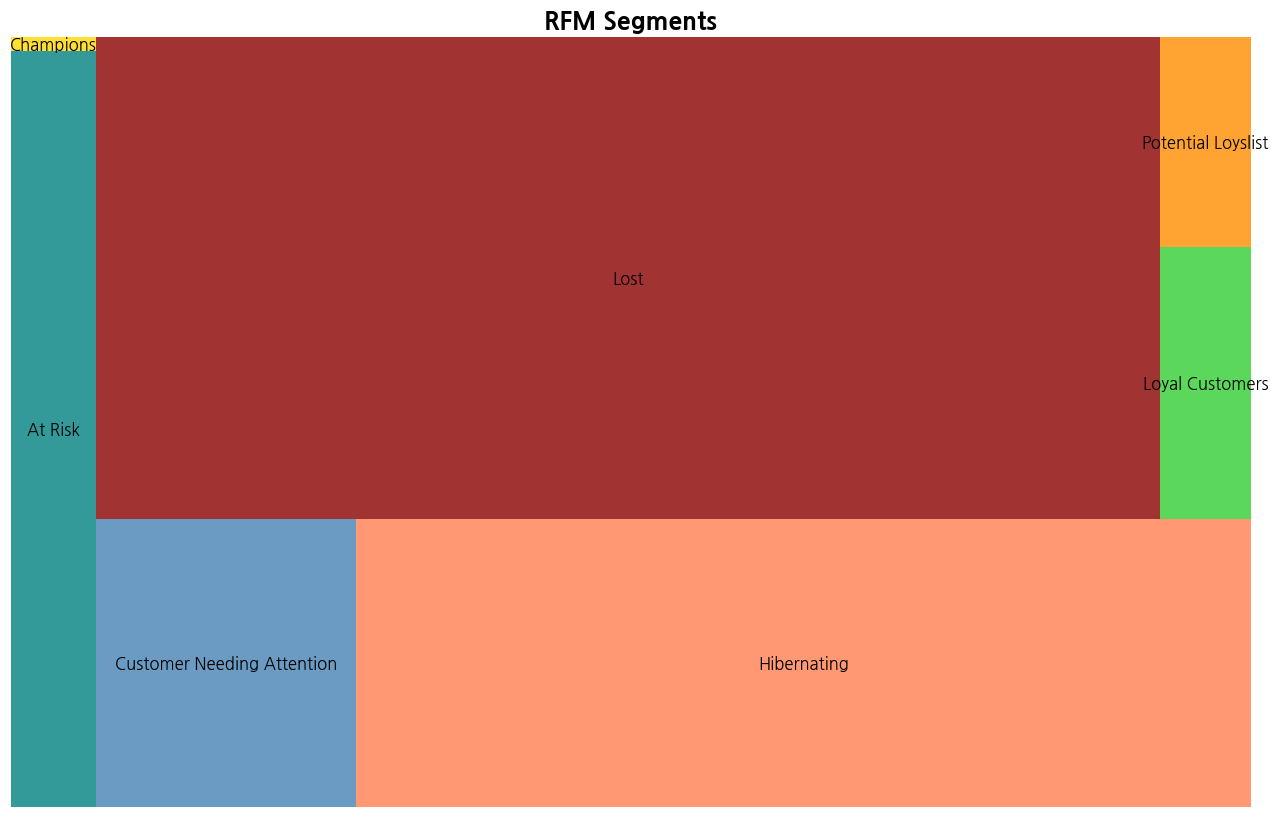

In [ ]:
import matplotlib.pyplot as plt
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['teal', 'gold', 'steelblue', 'coral', 'darkred','limegreen', 'darkorange','steelblue'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
df_health_beauty = df_all[df_all['product_category_name'] == "health_beauty"]
df_furniture_decor = df_all[df_all['product_category_name'] == 'furniture_decor']
df_auto = df_all[df_all['product_category_name'] == 'auto']
df_watches_gifts = df_all[df_all['product_category_name'] == 'watches_gifts']
df_bed_bath_table = df_all[df_all['product_category_name'] == 'bed_bath_table']
df_computers_accessories = df_all[df_all['product_category_name'] == 'computers_accessories']
df_housewares = df_all[df_all['product_category_name'] == 'housewares']
df_sports_leisure = df_all[df_all['product_category_name'] == 'sports_leisure']

### health_beauty

In [ ]:
import datetime

max_date = max(df_top8["order_purchase_timestamp"]) + datetime.timedelta(days=1)

In [ ]:
rfm_health_beauty = df_health_beauty.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_health_beauty.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_health_beauty.head()

,customer_id,recency,frequency,monetary
0,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
1,000a5ad9c4601d2bbdd9ed765d5213b3,384,1,76.99
2,0014a5a58da615f7b01a4f5e194bf5ea,223,1,88.00
3,00293787e2aec37a9c253b63fdfe2049,307,2,237.80
4,002ae492472e45ad6ebeb7a625409392,325,2,103.98


In [ ]:
rfm_health_beauty.describe()

,recency,frequency,monetary
count,8678.000000,8678.000000,8678.000000
mean,218.189099,1.156027,150.028575
std,156.491973,0.601824,213.926995
min,1.000000,1.000000,4.400000
25%,85.000000,1.000000,49.900000
50%,189.000000,1.000000,89.900000
75%,323.000000,1.000000,158.925000
max,714.000000,21.000000,6248.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [ ]:
r_labels = k_means_group(rfm_health_beauty[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_health_beauty[['frequency']],6,1)
m_labels = k_means_group(rfm_health_beauty[['monetary']],6,1)

In [ ]:
rfm_health_beauty = rfm_health_beauty.assign(R = r_labels, F = f_labels, M = m_labels) 

In [ ]:
rfm_health_beauty['R'] = rfm_health_beauty['R'] - 1
rfm_health_beauty['R'] = rfm_health_beauty['F'] - 1
rfm_health_beauty['R'] = rfm_health_beauty['M'] - 1

In [ ]:
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'# '충성 고객'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'# '잠재적 충성 고객'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention' #'구매를 자주 하지만 다음 구매까지 이어질 지 의심스러운 고객'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk' # '소액을 자주 산, 짧은 기간의 고객'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating' # '동면'
    return 'Lost' # '떠난 고객'

In [ ]:
rfm_health_beauty['segment'] = rfm_health_beauty.apply(get_segment,axis=1)

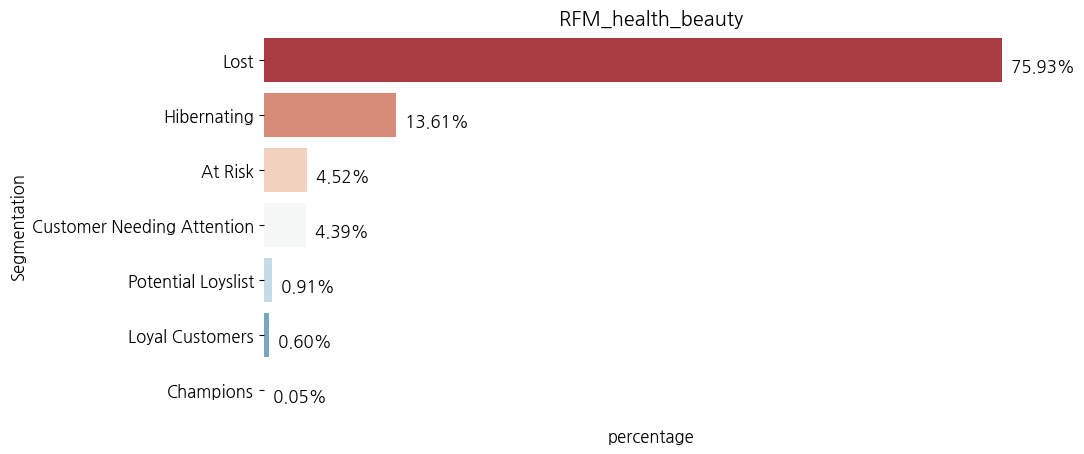

In [ ]:
plt.figure(figsize=(10,5))
percentage = (rfm_health_beauty['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_health_beauty")
plt.show()

In [ ]:
pd.DataFrame((rfm_health_beauty['segment'].value_counts(1))).sort_index()

,segment
At Risk,0.045172
Champions,0.000461
Customer Needing Attention,0.043904
Hibernating,0.136091
Lost,0.759276
Loyal Customers,0.005992
Potential Loyslist,0.009103


In [ ]:
score = [2, 6, 3, 1, 0, 5, 4]
health_beauty_segper = pd.DataFrame((rfm_health_beauty['segment'].value_counts(1))).sort_index()
health_beauty_segper['score'] = score
health_beauty_segper['criteria'] = health_beauty_segper['segment'] * health_beauty_segper['score']
health_beauty_sum = health_beauty_segper['criteria'].sum()
health_beauty_sum

0.4272873934086195

### furniture_decor

In [ ]:
rfm_furniture_decor = df_furniture_decor.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_furniture_decor.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_furniture_decor.head()

,customer_id,recency,frequency,monetary
0,00256bf7b05c08f6a5849df3d0a64f1f,89,1,39.50
1,0029bd580d3012618731f5abb174a07f,301,1,39.90
2,0036b4a3d09ad551a5188c2e374da402,385,1,148.00
3,0037d2bbb9ebc39d9114aea27ee16d72,521,1,119.90
4,003ac9408252444b489b1bfc013f5f8c,166,1,18.75


In [ ]:
r_labels = k_means_group(rfm_furniture_decor[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_furniture_decor[['frequency']],6,1)
m_labels = k_means_group(rfm_furniture_decor[['monetary']],6,1)

In [ ]:
rfm_furniture_decor = rfm_furniture_decor.assign(R = r_labels, F = f_labels, M = m_labels) 

In [ ]:
rfm_furniture_decor['R'] = rfm_furniture_decor['R'] - 1
rfm_furniture_decor['R'] = rfm_furniture_decor['F'] - 1
rfm_furniture_decor['R'] = rfm_furniture_decor['M'] - 1

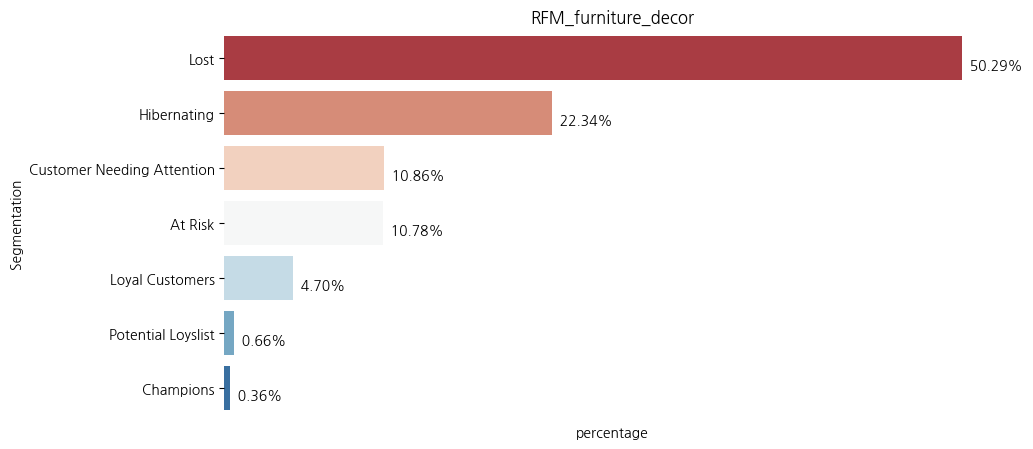

In [ ]:
rfm_furniture_decor['segment'] = rfm_furniture_decor.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_furniture_decor['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_furniture_decor")
plt.show()

In [ ]:
pd.DataFrame((rfm_furniture_decor['segment'].value_counts(1))).sort_index()

score = [2, 6, 3, 1, 0, 5, 4]
furniture_decor_segper = pd.DataFrame((rfm_furniture_decor['segment'].value_counts(1))).sort_index()
furniture_decor_segper['score'] = score
furniture_decor_segper['criteria'] = furniture_decor_segper['segment'] * furniture_decor_segper['score']
furniture_decor_sum = furniture_decor_segper['criteria'].sum()
furniture_decor_sum

1.0482824125375971

### auto

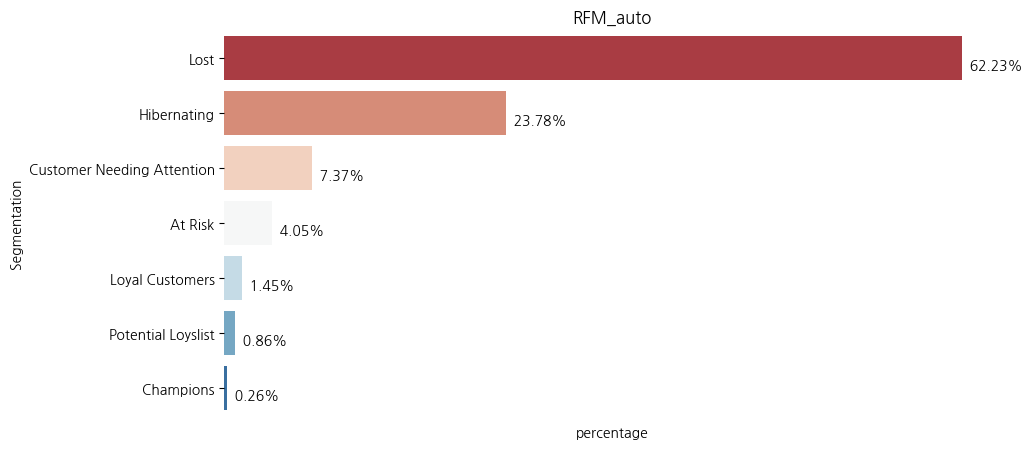

0.6625129802699896

In [ ]:
# RFM
rfm_auto = df_auto.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_auto.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_auto.head()

# K-means
r_labels = k_means_group(rfm_auto[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_auto[['frequency']],6,1)
m_labels = k_means_group(rfm_auto[['monetary']],6,1)

rfm_auto = rfm_auto.assign(R = r_labels, F = f_labels, M = m_labels) 

rfm_auto['R'] = rfm_auto['R'] - 1
rfm_auto['R'] = rfm_auto['F'] - 1
rfm_auto['R'] = rfm_auto['M'] - 1

# 그래프 그리기
rfm_auto['segment'] = rfm_auto.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_auto['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_auto")
plt.show()

# 점수 구하기
pd.DataFrame((rfm_auto['segment'].value_counts(1))).sort_index()

score = [2, 6, 3, 1, 0, 5, 4]
auto_segper = pd.DataFrame((rfm_auto['segment'].value_counts(1))).sort_index()
auto_segper['score'] = score
auto_segper['criteria'] = auto_segper['segment'] * auto_segper['score']
auto_sum = auto_segper['criteria'].sum()
auto_sum

### watches_gifts

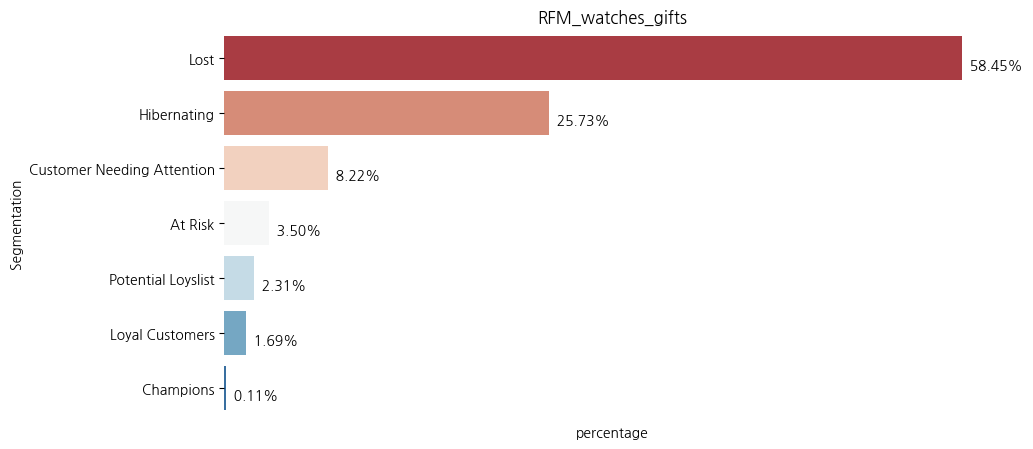

0.7573463133225166

In [ ]:
# RFM
rfm_watches_gifts = df_watches_gifts.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_watches_gifts.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_watches_gifts.head()

# K-means
r_labels = k_means_group(rfm_watches_gifts[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_watches_gifts[['frequency']],6,1)
m_labels = k_means_group(rfm_watches_gifts[['monetary']],6,1)

rfm_watches_gifts = rfm_watches_gifts.assign(R = r_labels, F = f_labels, M = m_labels) 

rfm_watches_gifts['R'] = rfm_watches_gifts['R'] - 1
rfm_watches_gifts['R'] = rfm_watches_gifts['F'] - 1
rfm_watches_gifts['R'] = rfm_watches_gifts['M'] - 1

# 그래프 그리기
rfm_watches_gifts['segment'] = rfm_watches_gifts.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_watches_gifts['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_watches_gifts")
plt.show()

# 점수 구하기
pd.DataFrame((rfm_watches_gifts['segment'].value_counts(1))).sort_index()

score = [2, 6, 3, 1, 0, 5, 4]
watches_gifts_segper = pd.DataFrame((rfm_watches_gifts['segment'].value_counts(1))).sort_index()
watches_gifts_segper['score'] = score
watches_gifts_segper['criteria'] = watches_gifts_segper['segment'] * watches_gifts_segper['score']
watches_gifts_sum = watches_gifts_segper['criteria'].sum()
watches_gifts_sum

### bed_bath_table

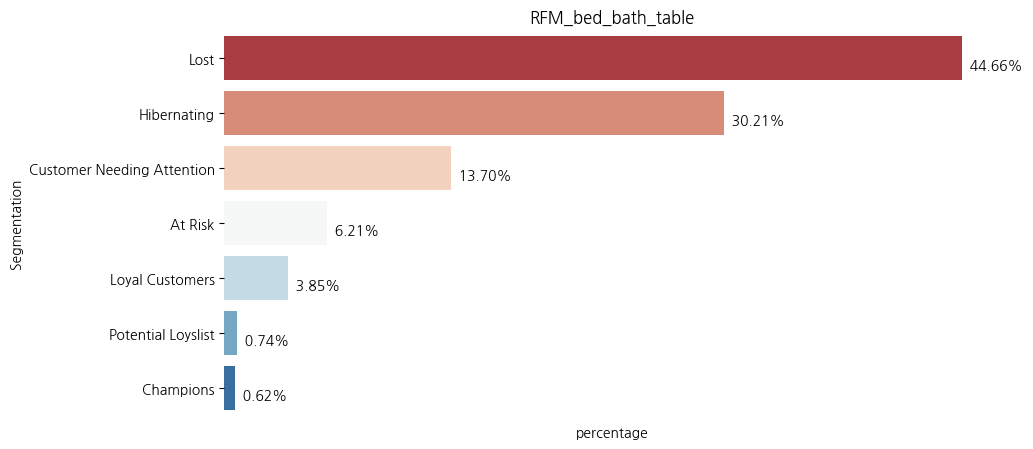

1.0969928922908692

In [ ]:
# RFM
rfm_bed_bath_table = df_bed_bath_table.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_bed_bath_table.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_bed_bath_table.head()

# K-means
r_labels = k_means_group(rfm_bed_bath_table[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_bed_bath_table[['frequency']],6,1)
m_labels = k_means_group(rfm_bed_bath_table[['monetary']],6,1)

rfm_bed_bath_table = rfm_bed_bath_table.assign(R = r_labels, F = f_labels, M = m_labels) 

rfm_bed_bath_table['R'] = rfm_bed_bath_table['R'] - 1
rfm_bed_bath_table['R'] = rfm_bed_bath_table['F'] - 1
rfm_bed_bath_table['R'] = rfm_bed_bath_table['M'] - 1

# 그래프 그리기
rfm_bed_bath_table['segment'] = rfm_bed_bath_table.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_bed_bath_table['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_bed_bath_table")
plt.show()

# 점수 구하기
pd.DataFrame((rfm_bed_bath_table['segment'].value_counts(1))).sort_index()

score = [2, 6, 3, 1, 0, 5, 4]
bed_bath_table_segper = pd.DataFrame((rfm_bed_bath_table['segment'].value_counts(1))).sort_index()
bed_bath_table_segper['score'] = score
bed_bath_table_segper['criteria'] = bed_bath_table_segper['segment'] * bed_bath_table_segper['score']
bed_bath_table_sum = bed_bath_table_segper['criteria'].sum()
bed_bath_table_sum

### computers_accessories

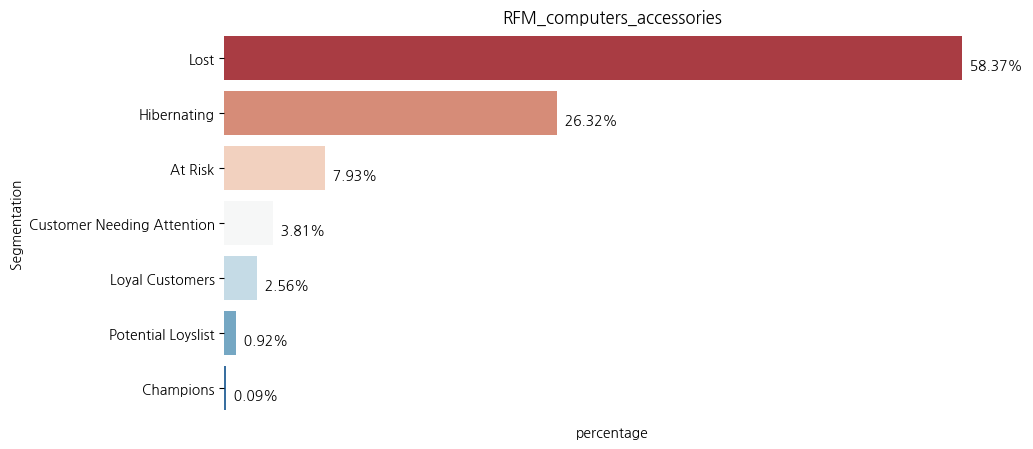

0.7064206191856031

In [ ]:
# RFM
rfm_computers_accessories = df_computers_accessories.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_computers_accessories.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_computers_accessories.head()

# K-means
r_labels = k_means_group(rfm_computers_accessories[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_computers_accessories[['frequency']],6,1)
m_labels = k_means_group(rfm_computers_accessories[['monetary']],6,1)

rfm_computers_accessories = rfm_computers_accessories.assign(R = r_labels, F = f_labels, M = m_labels) 

rfm_computers_accessories['R'] = rfm_computers_accessories['R'] - 1
rfm_computers_accessories['R'] = rfm_computers_accessories['F'] - 1
rfm_computers_accessories['R'] = rfm_computers_accessories['M'] - 1

# 그래프 그리기
rfm_computers_accessories['segment'] = rfm_computers_accessories.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_computers_accessories['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_computers_accessories")
plt.show()

# 점수 구하기
pd.DataFrame((rfm_computers_accessories['segment'].value_counts(1))).sort_index()

score = [2, 6, 3, 1, 0, 5, 4]
computers_accessories_segper = pd.DataFrame((rfm_computers_accessories['segment'].value_counts(1))).sort_index()
computers_accessories_segper['score'] = score
computers_accessories_segper['criteria'] = computers_accessories_segper['segment'] * computers_accessories_segper['score']
computers_accessories_sum = computers_accessories_segper['criteria'].sum()
computers_accessories_sum

### housewares

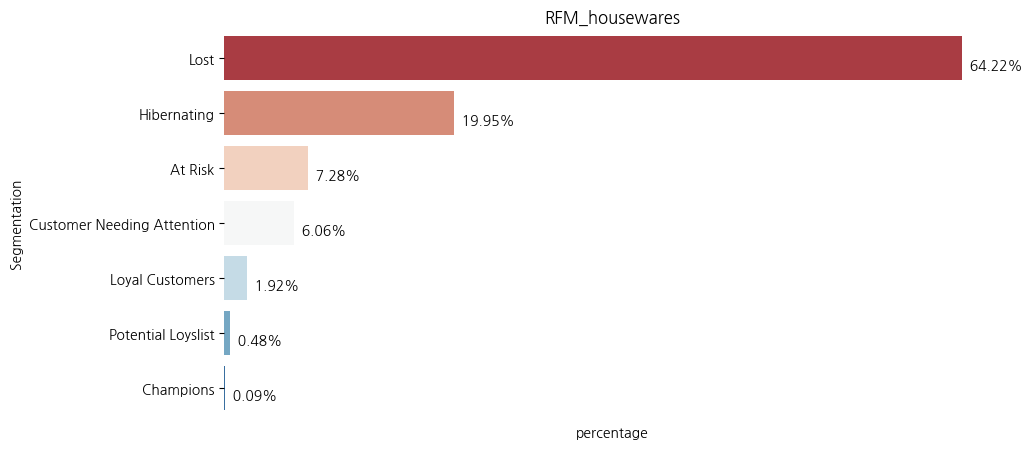

0.647655042088988

In [ ]:
# RFM
rfm_housewares = df_housewares.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_housewares.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_housewares.head()

# K-means
r_labels = k_means_group(rfm_housewares[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_housewares[['frequency']],6,1)
m_labels = k_means_group(rfm_housewares[['monetary']],6,1)

rfm_housewares = rfm_housewares.assign(R = r_labels, F = f_labels, M = m_labels) 

rfm_housewares['R'] = rfm_housewares['R'] - 1
rfm_housewares['R'] = rfm_housewares['F'] - 1
rfm_housewares['R'] = rfm_housewares['M'] - 1

# 그래프 그리기
rfm_housewares['segment'] = rfm_housewares.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_housewares['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_housewares")
plt.show()

# 점수 구하기
pd.DataFrame((rfm_housewares['segment'].value_counts(1))).sort_index()

score = [2, 6, 3, 1, 0, 5, 4]
housewares_segper = pd.DataFrame((rfm_housewares['segment'].value_counts(1))).sort_index()
housewares_segper['score'] = score
housewares_segper['criteria'] = housewares_segper['segment'] * housewares_segper['score']
house_wares_sum = housewares_segper['criteria'].sum()
house_wares_sum

### sports_leisure

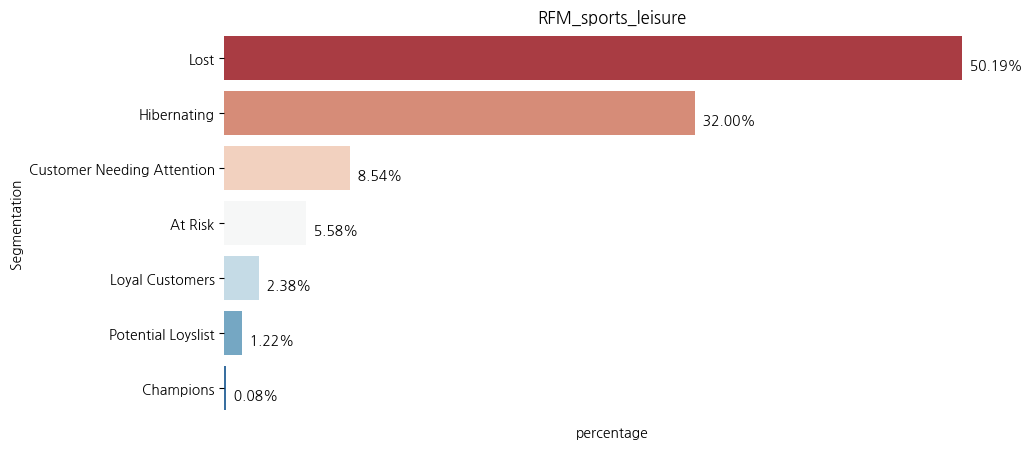

0.860678642714571

In [ ]:
# RFM
rfm_sports_leisure = df_sports_leisure.groupby("customer_unique_id").agg({
    "order_purchase_timestamp" : lambda x: (max_date - x.max()).days,
    "customer_id" : "count",
    "price" : "sum"
}).reset_index()
rfm_sports_leisure.columns=["customer_id", "recency", "frequency", "monetary"]
rfm_sports_leisure.head()

# K-means
r_labels = k_means_group(rfm_sports_leisure[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_sports_leisure[['frequency']],6,1)
m_labels = k_means_group(rfm_sports_leisure[['monetary']],6,1)

rfm_sports_leisure = rfm_sports_leisure.assign(R = r_labels, F = f_labels, M = m_labels) 

rfm_sports_leisure['R'] = rfm_sports_leisure['R'] - 1
rfm_sports_leisure['R'] = rfm_sports_leisure['F'] - 1
rfm_sports_leisure['R'] = rfm_sports_leisure['M'] - 1

# 그래프 그리기
rfm_sports_leisure['segment'] = rfm_sports_leisure.apply(get_segment,axis=1)

plt.figure(figsize=(10,5))
percentage = (rfm_sports_leisure['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="RdBu")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
g.set_title("RFM_sports_leisure")
plt.show()

# 점수 구하기
pd.DataFrame((rfm_sports_leisure['segment'].value_counts(1))).sort_index()

score = [2, 6, 3, 1, 0, 5, 4]
sports_leisure_segper = pd.DataFrame((rfm_sports_leisure['segment'].value_counts(1))).sort_index()
sports_leisure_segper['score'] = score
sports_leisure_segper['criteria'] = sports_leisure_segper['segment'] * sports_leisure_segper['score']
sports_leisure_sum = sports_leisure_segper['criteria'].sum()
sports_leisure_sum

In [ ]:
top8_sum = ["category", "sum"]
pd.DataFrame(top8_sum)

,0
0,category
1,sum


In [ ]:
top8_sum = [health_beauty_sum,
 furniture_decor_sum,
 auto_sum,
 watches_gifts_sum,
 bed_bath_table_sum,
 computers_accessories_sum,
 house_wares_sum,
 sports_leisure_sum]

In [ ]:
top8_cat = ['health_beauty',
 'furniture_decor',
 'auto',
 'watches_gifts',
 'bed_bath_table',
 'computers_accessories',
 'house_wares',
 'sports_leisure']

In [ ]:
Top8_RFM = pd.DataFrame({'category':top8_cat, 'RFM_total':top8_sum}).sort_values('category').reset_index(drop=True)
Top8_RFM

,category,RFM_total
0,auto,0.662513
1,bed_bath_table,1.096993
2,computers_accessories,0.706421
3,furniture_decor,1.048282
4,health_beauty,0.427287
5,house_wares,0.647655
6,sports_leisure,0.860679
7,watches_gifts,0.757346


In [ ]:
Top8_RFM.to_csv("Top8_RFM.csv",index=False)

In [ ]:
pd.read_csv("Top8_RFM.csv")

,category,RFM_total
0,auto,0.662513
1,bed_bath_table,1.096993
2,computers_accessories,0.706421
3,furniture_decor,1.048282
4,health_beauty,0.427287
5,house_wares,0.647655
6,sports_leisure,0.860679
7,watches_gifts,0.757346
